# Response analysis by relative subtype proportions

Figure 3A, Extended Data Figure 3A, Supplementary Figure 3A-D  

- Author: CW
- Files needed: clinical_var_analysis/celltype_mapping.csv, clinical_var_analysis/cohort_relative_subtype_proportions.csv, clinical_var_analysis/cohort_relative_celltype_proportions.csv, Supplementary_Table_1.csv 
- Last updated: 04/10/24

In [7]:
library(dplyr)
library(ggplot2)
library(gridExtra)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




## Load necessary tables 

In [5]:
celltype_mapping <- read.csv('/path_to_file/celltype_mapping.csv', row.names = "X")

In [6]:
celltype_mapping

,subtype,reannotated,compartment
,<chr>,<chr>,<chr>
1,Plasma B,B,Immune
2,Macrophage M2,Monocyte/Macrophage,Immune
3,Endothelial,Endothelial,Stromal
4,cDC1,cDC,Immune
5,Macrophage M1,Monocyte/Macrophage,Immune
6,Inflammatory fibroblast,Fibroblast,Stromal
7,cDC2,cDC,Immune
8,DN NKT,Other T,Immune
9,Monocyte non-classical,Monocyte/Macrophage,Immune


In [3]:
clinical_metadata <- read.csv("/home/cbw3/data/figure_generation/Supplementary_Tables/Supplementary_Table_1/Supplementary_Table_1.csv", row.names = 'X')

In [6]:
head(clinical_metadata)

,sample_ID_long,patient,uid,age,sex,subtype,sample_date,treatment,treatment_group,adjuvant,⋯,day_to_treatment,overall_response,response_short,with_ICI,ICI_only,mDC_out_of_cDC,is_mDC_high,mDC_status,patient_sample,ATAC_sample_ID
,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,⋯,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<chr>,<chr>,<chr>
1,D18-11807,946,94610/24/2018,85,M,cutaneous,10/24/18,"ERKi (prior pembro, PDL1+CSF1Ri)",targeted,FALSE,⋯,-112,PR,R,no,no,0.00000000,0,low,946_1,none
2,D18-11808,926,92611/01/2018,62,M,cutaneous,11/1/18,pembro,ICI_PD1,FALSE,⋯,22,PD,NR,yes,yes,0.18478261,0,low,926_1,none
3,D18-11809,406,40611/05/2018,70,M,cutaneous,11/5/18,"pembro (prior TVEC, d+t, IFN)",ICI_PD1,FALSE,⋯,-3,PD,NR,yes,yes,0.16438356,0,low,406_3,none
4,D19-11960,1224,122408/29/2019,79,M,cutaneous,8/29/19,pembro,ICI_PD1,FALSE,⋯,71,PD,NR,yes,yes,0.00000000,0,low,1224_3,D19-11983 D19-11984
5,D19-11962,1098,109809/16/2019,24,F,cutaneous,9/16/19,"enco+Bini (+ NIVO, prior IPI+NIVO, enco+bini)",targeted_plus_ICI,FALSE,⋯,19,R,R,yes,no,0.20833333,1,high,1098_5,none
6,D19-11963,1232,123209/13/2019,79,F,mucosal,9/13/19,pembro +PCV,other_plus_ICI,FALSE,⋯,-47,R,R,yes,no,0.02702703,0,low,1232_1,none


In [54]:
# add ICI status column to clinical metadata
clinical_metadata$ICI_status <- 'none'
clinical_metadata[clinical_metadata$with_ICI == 'yes',]$ICI_status <- "with"
clinical_metadata[clinical_metadata$ICI_only == 'yes',]$ICI_status <- "only"

In [7]:
#exclude patient sample 1122_1 from any kind of analysis
clinical_metadata <- clinical_metadata[!clinical_metadata$patient_sample == '1122_1',]

## Boxplots using samples of all treatment groups - Extended Figure 3A, Supplementary Figure 3A, B, C

In [8]:
#read in csvs of abundances and proportions 

In [8]:
subtype_proportions <- read.csv('/net/bmc-lab5/data/kellis/group/scCancer2023/objects_for_DC_manuscript/for_public/cohort_relative_subtype_proportions.csv', check.names = FALSE)
colnames(subtype_proportions)[1] <- 'proportion'
head(subtype_proportions)

,proportion,1098_5,1098_4,1098_3,1063_1,946_1,926_1,406_3,978_1,98_1,⋯,776_1,856_1,808_1,1098_1,1224_1,1224_2,406_2,1098_2,452_1,620_2
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Plasma B/B,1.000000000,0.00000000,0.00000000,0.850000000,0.0000000,0.37189374,0.30852843,0.037037037,0.250000000,⋯,0.000000000,1.00000000,0.230769231,NA,NA,0.100000000,0.00000000,0.037037037,0.833333333,0.00000000
2,Plasma B/Immune,0.001199041,0.00000000,0.00000000,0.056105611,0.0000000,0.09633740,0.06671488,0.004366812,0.001248439,⋯,0.000000000,0.02857143,0.006465517,0.00000000,0.000000000,0.000786164,0.00000000,0.002159827,0.001719986,0.00000000
3,Plasma B/Total,0.001073729,0.00000000,0.00000000,0.009269357,0.0000000,0.08930041,0.06216307,0.000261643,0.000345423,⋯,0.000000000,0.01347882,0.001448576,0.00000000,0.000000000,0.000349773,0.00000000,0.000712758,0.000565995,0.00000000
4,Macrophage M2/Monocyte/Macrophage,0.803827751,0.11602210,0.39661017,0.458064516,0.4812500,0.53301887,0.54269972,0.129411765,0.309963100,⋯,0.534246575,0.75172414,0.404761905,0.31292517,0.142857143,0.258196721,0.04065041,0.146964856,0.220827179,0.26048565
5,Macrophage M2/Immune,0.067146283,0.02192067,0.07997266,0.234323432,0.3484163,0.02508324,0.03561743,0.048034934,0.104868914,⋯,0.008797654,0.14829932,0.036637931,0.03552124,0.011160714,0.024764151,0.03656307,0.099352052,0.102855177,0.02074908
6,Macrophage M2/Total,0.060128848,0.01191828,0.05467290,0.038713195,0.1392405,0.02325103,0.03318733,0.002878074,0.029015544,⋯,0.008632138,0.06996149,0.008208595,0.01588398,0.005720824,0.011017838,0.02675585,0.032786885,0.033846502,0.01954937


In [9]:
#exclude 1122_1 from analysis
subtype_proportions <- subtype_proportions[,colnames(subtype_proportions) != '1122_1',]

In [10]:
#transpose subtype proportions 
subtype_proportions_T <- as.data.frame(t(subtype_proportions))
colnames(subtype_proportions_T) <- rownames(subtype_proportions)

In [11]:
#rename columns and rownamees
colnames(subtype_proportions_T) <- subtype_proportions_T[1,]
subtype_proportions_T <- subtype_proportions_T[-1,]

In [12]:
patient_samples <- rownames(subtype_proportions_T)

In [14]:
#change column names, any / or space  --> _ 
colnames(subtype_proportions_T) <- unlist(lapply(colnames(subtype_proportions_T), function(x) gsub('/', '_', x)))
colnames(subtype_proportions_T) <- unlist(lapply(colnames(subtype_proportions_T), function(x) gsub(' ', '_', x)))
colnames(subtype_proportions_T) <- unlist(lapply(colnames(subtype_proportions_T), function(x) gsub('-', '_', x)))
colnames(subtype_proportions_T) <- unlist(lapply(colnames(subtype_proportions_T), function(x) gsub(paste(c("[(]", "[)]", '[+]'), collapse = "|"), '', x)))

### Master proportion table 

In [15]:
rownames(subtype_proportions_T)

[1] "1098_5" "1098_4" "1098_3" "1063_1" "946_1"  "926_1"  "406_3"  "978_1" 
 [9] "98_1"   "964_1"  "406_4"  "406_1"  "479_1"  "667_1"  "1138_1" "620_1" 
[17] "1009_1" "1171_1" "1232_1" "1037_1" "854_1"  "1227_1" "1087_1" "509_2" 
[25] "880_1"  "1224_3" "452_2"  "509_1"  "776_1"  "856_1"  "808_1"  "1098_1"
[33] "1224_1" "1224_2" "406_2"  "1098_2" "452_1"  "620_2"

In [57]:
subtype_proportions_T$patient_sample <- rownames(subtype_proportions_T)

#all samples
merged_props_response <- merge(subtype_proportions_T, clinical_metadata, by= 'patient_sample')
subtype_proportions_T$patient_sample <- NULL

#### with ICI

In [67]:
merged_props_response_w_ICI <- merged_props_response[merged_props_response$with_ICI == 'yes',]

#### only ICI

In [68]:
merged_props_response_ICI_only <- merged_props_response[merged_props_response$ICI_only == 'yes',]

#### anti PD1

In [84]:
merged_props_response_ICI_PD1 <- merged_props_response[merged_props_response$treatment_group == 'ICI_PD1',]

### 1. collect subset of subtype/celltype proportions

In [23]:
subtype_to_reannotated_titles <- paste0(celltype_mapping$subtype, "/",celltype_mapping$reannotated )
#change column names, any / or space  --> _ 
subtype_to_reannotated_colnames<- unlist(lapply(subtype_to_reannotated_titles, function(x) gsub(paste(c('/', ' ', '-'), collapse = '|'), '_', x)))
subtype_to_reannotated_colnames <- unlist(lapply(subtype_to_reannotated_colnames, function(x) gsub(paste(c("[(]", "[)]", '[+]'), collapse = "|"), '', x)))

### 2. collect subset of subtype/compartment proportions

In [24]:
subtype_to_compartment_titles <- paste0(celltype_mapping$subtype, "/",celltype_mapping$compartment )
#change column names, any / or space  --> _ 
subtype_to_compartment_colnames<- unlist(lapply(subtype_to_compartment_titles, function(x) gsub(paste(c('/', ' ', '-'), collapse = '|'), '_', x)))
subtype_to_compartment_colnames <- unlist(lapply(subtype_to_compartment_colnames, function(x) gsub(paste(c("[(]", "[)]", '[+]'), collapse = "|"), '', x)))

### 3. collect subset of subtype/general proportions

In [25]:
subtype_to_general_titles <- paste0(celltype_mapping$subtype, "/",celltype_mapping$general )
#change column names, any / or space  --> _ 
subtype_to_general_colnames<- unlist(lapply(subtype_to_general_titles, function(x) gsub(paste(c('/', ' ', '-'), collapse = '|'), '_', x)))
subtype_to_general_colnames <- unlist(lapply(subtype_to_general_colnames, function(x) gsub(paste(c("[(]", "[)]", '[+]'), collapse = "|"), '', x)))

### 4. collect subset of subtype/total proportions 

In [26]:
subtype_to_total_titles <- paste0(celltype_mapping$subtype, "/", "Total" )
#change column names, any / or space  --> _ 
subtype_to_total_colnames<- unlist(lapply(subtype_to_total_titles, function(x) gsub(paste(c('/', ' ', '-'), collapse = '|'), '_', x)))
subtype_to_total_colnames <- unlist(lapply(subtype_to_total_colnames, function(x) gsub(paste(c("[(]", "[)]", '[+]'), collapse = "|"), '', x)))

#### FUNCTIONS 

In [27]:
get_wilcoxon <- function(df, columns_of_props, prop_titles) {

    p_values <- c()
    test_statistics <- c()
    medians_r <- c()
    medians_nr <- c()
    for(i in 1:length(columns_of_props)) {
        
        prop = columns_of_props[i]
        prop_title = prop_titles[i]
        
        #subset response short, treatment group, subtype, and whether it is part of the ICI samples 
        #with the prop column 
        use_df <- df[c(prop, 'response_short', 'subtype', 'treatment_group', 'ICI_status')] %>% na.omit()
        #change prop column to double

        use_df[prop] <- lapply(use_df[prop], function(x) as.double(x))


        nr_samples <- use_df[use_df$response_short == 'NR',][,prop]
        r_samples <- use_df[use_df$response_short == 'R',][,prop]

        test <- wilcox.test(nr_samples, r_samples, alternative = 'two.sided')

        #calculate p value
        p_value <- round(test$p.value, 3)
        
        #print(paste(prop_title, p_value))
        p_values <- append(p_values, p_value)
        test_statistics <- append(test_statistics, test$statistic)
        medians_r <- append(medians_r, median(r_samples))
        medians_nr <- append(medians_nr, median(nr_samples))                                        

    }
    results <- data.frame(prop = prop_titles, abbr_prop = columns_of_props, statistic = test_statistics, p_val = p_values,
                             response_median = medians_r, nonresponse_median = medians_nr)
   return(results)
                               }

In [33]:
generate_boxplot <- function(df, results, prop, titles) {
    #subset response short, treatment group, subtype, and whether it is part of the ICI samples 
    #with the prop column 
    use_df <- df[c(prop, 'response_short', 'subtype', 'treatment_group', 'tissue', 'state', 'ICI_status')] %>% na.omit()
    #change prop column to double
    use_df[prop] <- lapply(use_df[prop], function(x) as.double(x))
    
    #get variables for the plot
                           
    #pvalue
    p_value = results$p_val
                           
    #median for nonresponse
    nr_median = results$nonresponse_median
                           
    #median for response
    r_median = results$response_median
                                   
    #prop title
    prop_title = titles[results$index]
    
    
    text_position_y = max(use_df[,prop] + 0.03)
    
    #plot 
    plot1<- ggplot(use_df, aes_string('response_short', prop)) +
                          #ylim(0, text_position_y+ 0.2) +
        geom_boxplot(fill='white', aes(group=response_short), outlier.shape = NA) +
        theme_bw()  +
        geom_jitter(aes(color=treatment_group, shape =subtype), width=0.15, size = 3) + 
        scale_color_manual(values = c( ICI_combo = "#00B050",  ICI_PD1 = "#3C76AF", other_plus_ICI = '#B2E08A',
                        targeted_plus_ICI = "#A6CEE4", other = "#FB9B9A",
                         targeted = "#FEBF6F")) +
        scale_shape_manual(values= c(acral = 3, cutaneous = 16, mucosal = 17, uveal = 15)) + 
        geom_text(aes(x=1.5, y=text_position_y,label=paste0('p = ', p_value),  #'\n', 'median for response: ', round(r_median,3),
                                                        #'\n', 'median for non-response: ', round(nr_median, 3)))
                     color="black", size = 4)) + ggtitle(paste0(prop_title, ' comparing NR and R')) + labs(x="Response", y=prop_title) 
                           
    return(plot1)
}

plots shown on Figure from this analysis
#### 1. All samples

In [64]:
num_nr <- sum(merged_props_response$response_short == 'NR')
num_r <- sum(merged_props_response$response_short == 'R')
num_nr
num_r

[1] 23

[1] 15

In [59]:
subtyped_to_reannotated_res <- get_wilcoxon(merged_props_response, subtype_to_reannotated_colnames, 
                                                   subtype_to_reannotated_titles)

Warning message in wilcox.test.default(nr_samples, r_samples, alternative = "two.sided"):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(nr_samples, r_samples, alternative = "two.sided"):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(nr_samples, r_samples, alternative = "two.sided"):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(nr_samples, r_samples, alternative = "two.sided"):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(nr_samples, r_samples, alternative = "two.sided"):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(nr_samples, r_samples, alternative = "two.sided"):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(nr_samples, r_samples, alternative = "two.sided"):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(nr_samples, r_samples, alternative = "two.si

In [61]:
subtyped_to_reannotated_res$index <- as.double(rownames(subtyped_to_reannotated_res))
sig_subtyped_to_reannotated_res <- subtyped_to_reannotated_res %>% filter(p_val <= 0.1 | prop %in% c('mDC/cDC', 
                                                                                                    'cDC1/cDC', 
                                                                                                    'cDC2/cDC'))

In [62]:
# To plot results that are shown in Extended Data Figure 3A and Supplementary Figure 3A, use "sig_subtyped_to_reannotated_res" 
# To plot all results, replace "sig_subtyped_to_reannotated_res" with "subtyped_to_reannotated_res"

all_plots <- list()
for (i in 1:length(sig_subtyped_to_reannotated_res$prop)) {
    
    plot <- generate_boxplot(merged_props_response, 
                             sig_subtyped_to_reannotated_res[i,], sig_subtyped_to_reannotated_res[i, 'abbr_prop'], 
                    subtype_to_reannotated_titles)
    
    prop <- sig_subtyped_to_reannotated_res[i, 'abbr_prop']
    
    all_plots[[prop]] <-  plot
}

Warning message:
“`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information.”


Warning message in geom_text(aes(x = 1.5, y = text_position_y, label = paste0("p = ", :
“All aesthetics have length 1, but the data has 36 rows.
ℹ Did you mean to use `annotate()`?”
Warning message in geom_text(aes(x = 1.5, y = text_position_y, label = paste0("p = ", :
“All aesthetics have length 1, but the data has 38 rows.
ℹ Did you mean to use `annotate()`?”


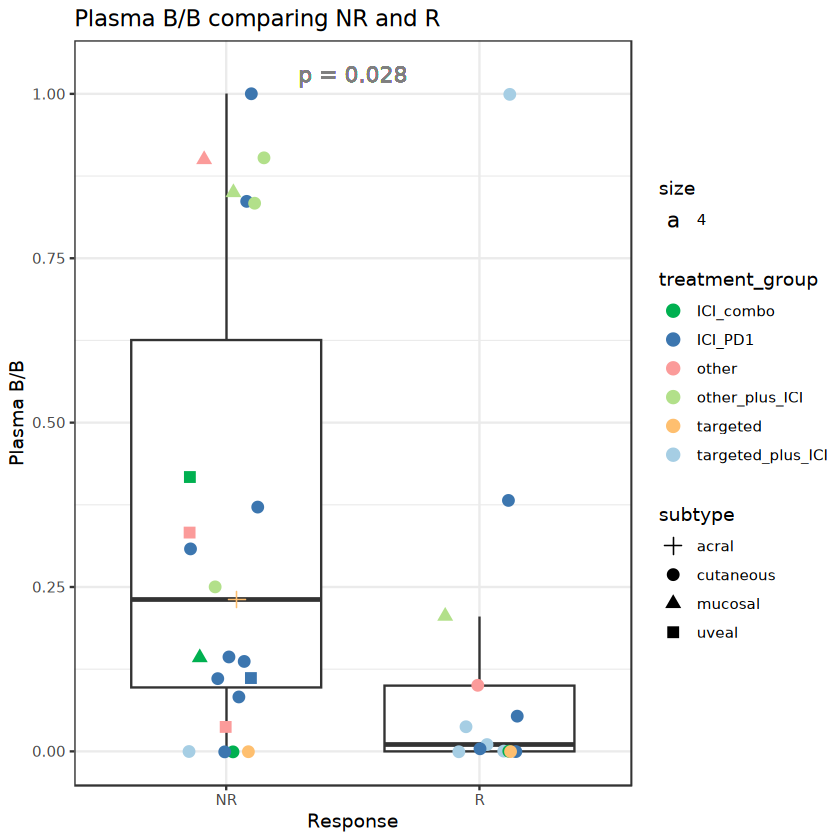

Warning message in geom_text(aes(x = 1.5, y = text_position_y, label = paste0("p = ", :
“All aesthetics have length 1, but the data has 37 rows.
ℹ Did you mean to use `annotate()`?”


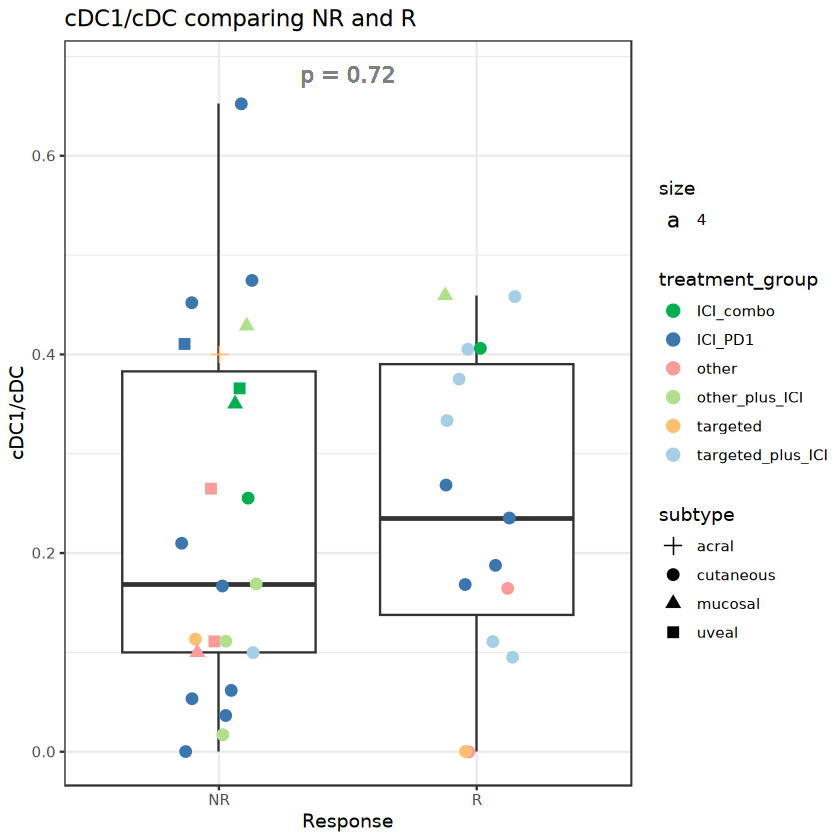

Warning message in geom_text(aes(x = 1.5, y = text_position_y, label = paste0("p = ", :
“All aesthetics have length 1, but the data has 38 rows.
ℹ Did you mean to use `annotate()`?”


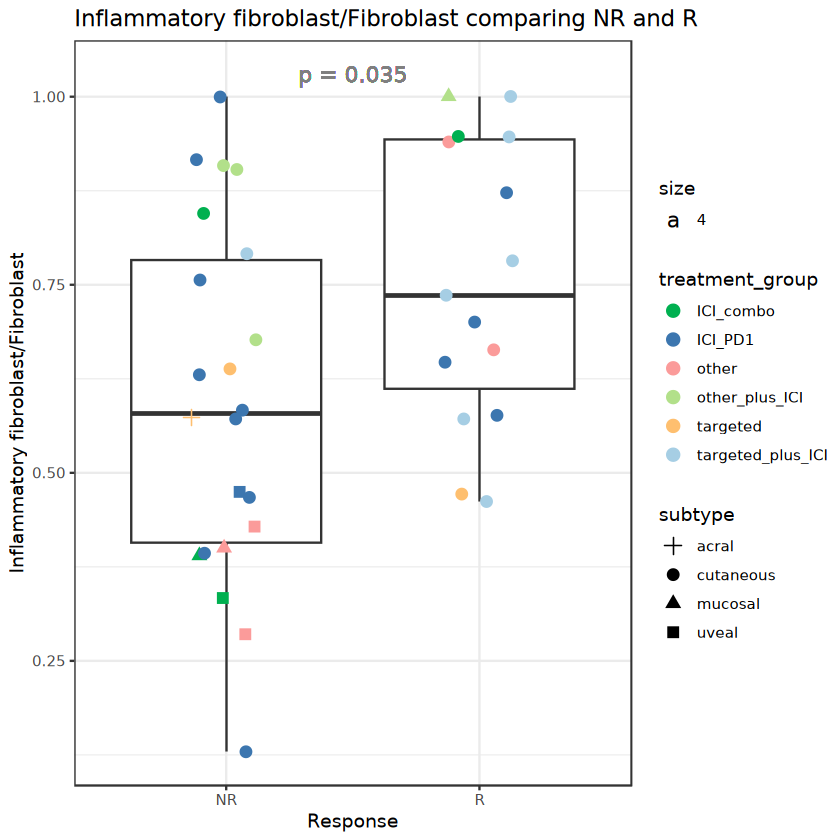

Warning message in geom_text(aes(x = 1.5, y = text_position_y, label = paste0("p = ", :
“All aesthetics have length 1, but the data has 37 rows.
ℹ Did you mean to use `annotate()`?”


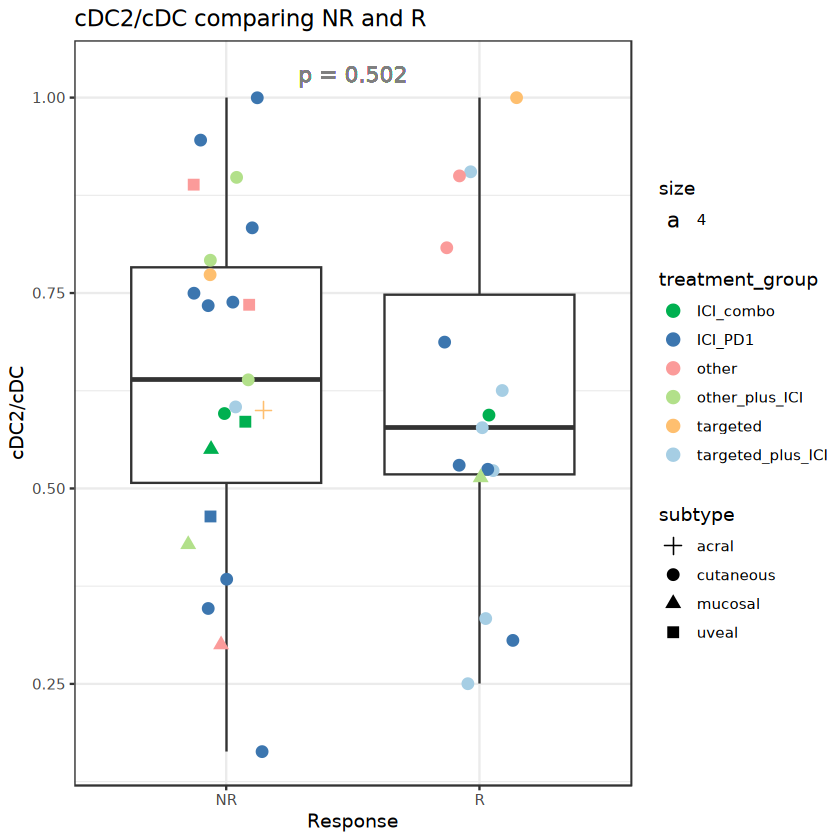

Warning message in geom_text(aes(x = 1.5, y = text_position_y, label = paste0("p = ", :
“All aesthetics have length 1, but the data has 35 rows.
ℹ Did you mean to use `annotate()`?”


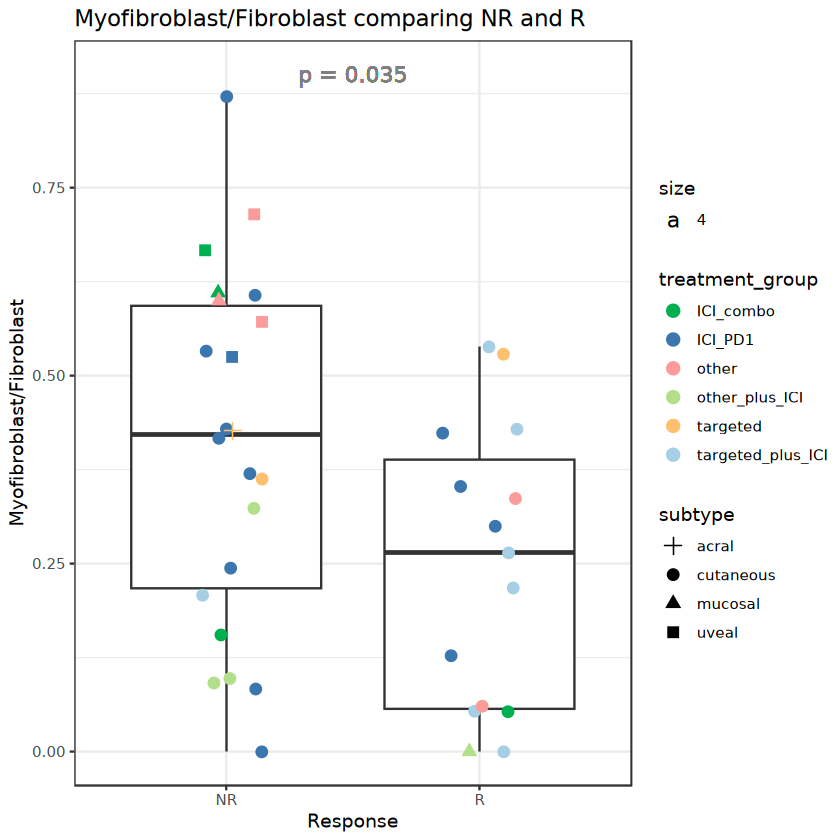

Warning message in geom_text(aes(x = 1.5, y = text_position_y, label = paste0("p = ", :
“All aesthetics have length 1, but the data has 38 rows.
ℹ Did you mean to use `annotate()`?”


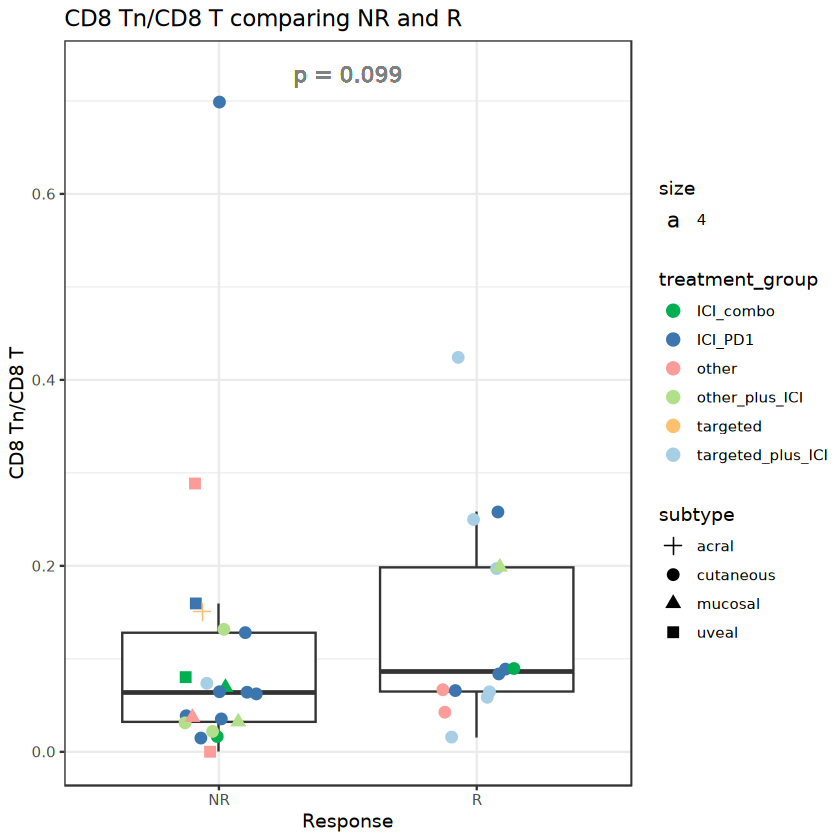

Warning message in geom_text(aes(x = 1.5, y = text_position_y, label = paste0("p = ", :
“All aesthetics have length 1, but the data has 34 rows.
ℹ Did you mean to use `annotate()`?”


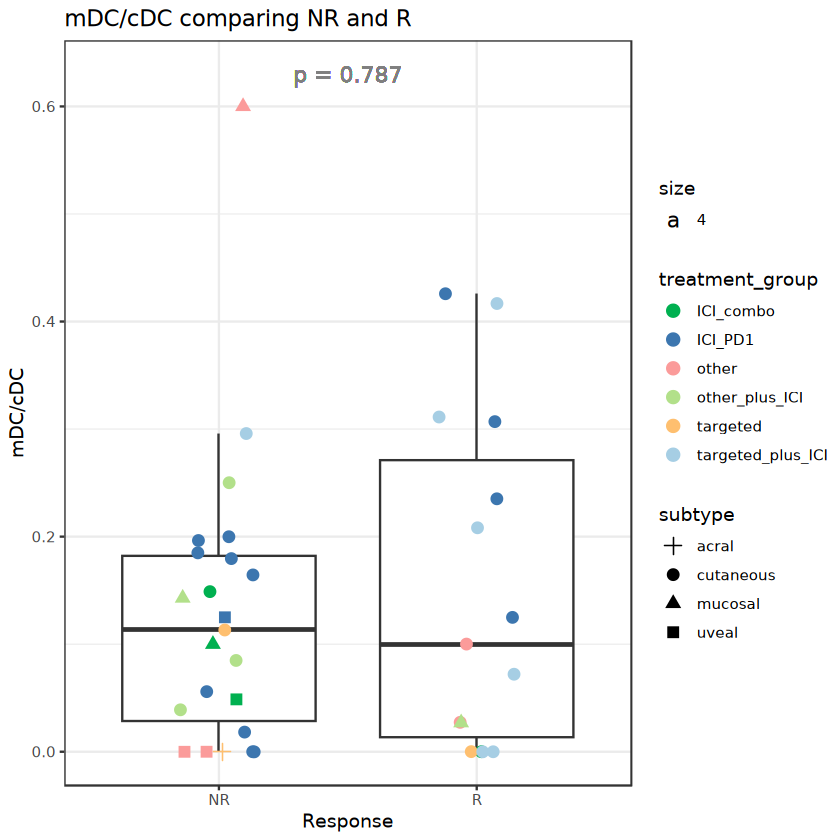

Warning message in geom_text(aes(x = 1.5, y = text_position_y, label = paste0("p = ", :
“All aesthetics have length 1, but the data has 34 rows.
ℹ Did you mean to use `annotate()`?”


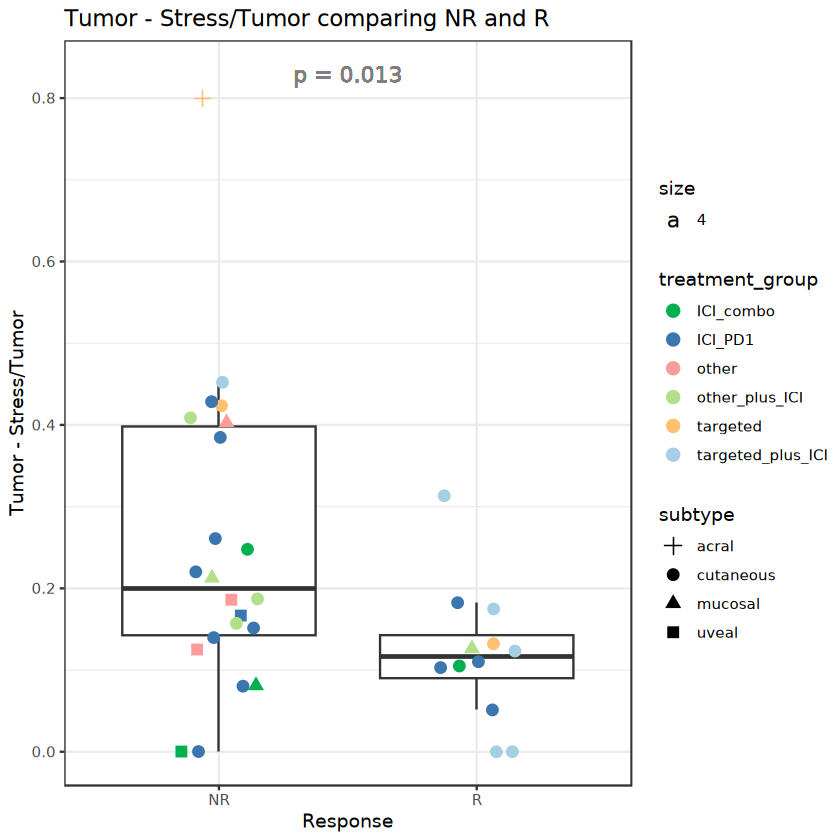

Warning message in geom_text(aes(x = 1.5, y = text_position_y, label = paste0("p = ", :
“All aesthetics have length 1, but the data has 34 rows.
ℹ Did you mean to use `annotate()`?”


$Plasma_B_B

$cDC1_cDC

$Inflammatory_fibroblast_Fibroblast

$cDC2_cDC

$Myofibroblast_Fibroblast

$CD8_Tn_CD8_T

$mDC_cDC

$Tumor___Stress_Tumor

$CD4_Treg_CD4_T

$Tumor___Cell_Cycle___G2_M_Tumor


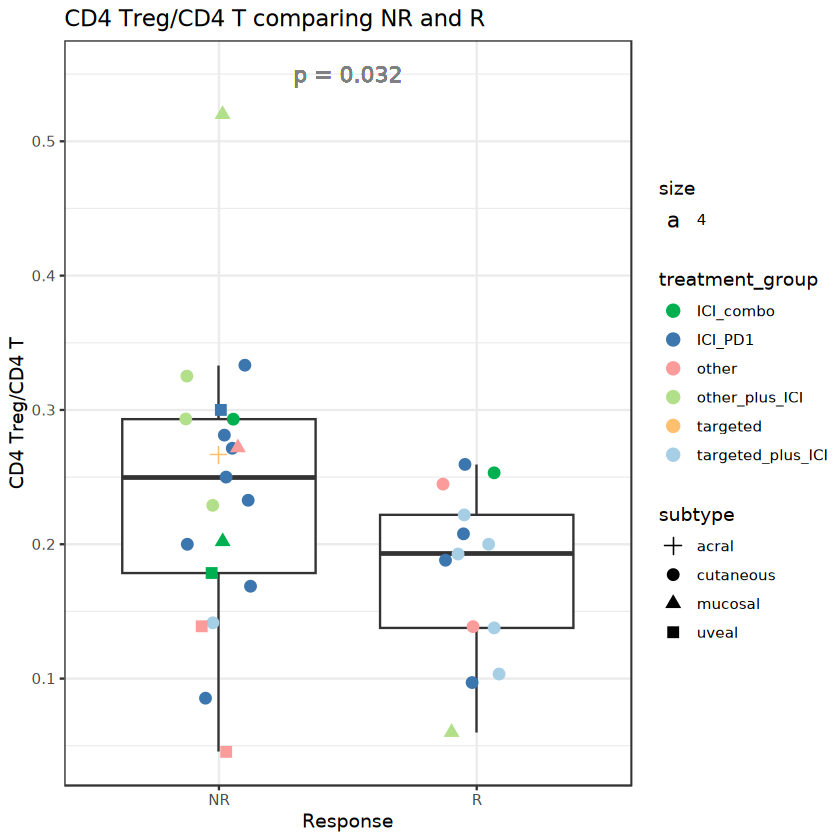

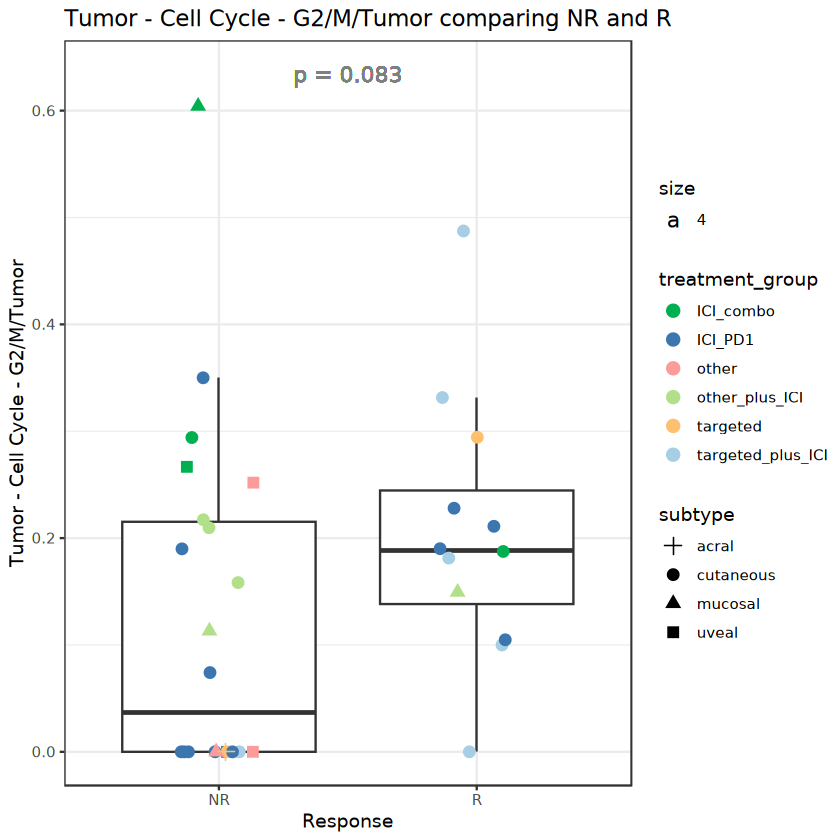

In [63]:
all_plots

#### 2. with ICI samples  (n = 30)

In [65]:
num_nr <- sum(merged_props_response_w_ICI$response_short == 'NR')
num_r <- sum(merged_props_response_w_ICI$response_short == 'R')
num_nr
num_r

[1] 18

[1] 12

In [70]:
subtyped_to_reannotated_res_w_ICI <- get_wilcoxon(merged_props_response_w_ICI, subtype_to_reannotated_colnames, 
                                                   subtype_to_reannotated_titles)

Warning message in wilcox.test.default(nr_samples, r_samples, alternative = "two.sided"):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(nr_samples, r_samples, alternative = "two.sided"):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(nr_samples, r_samples, alternative = "two.sided"):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(nr_samples, r_samples, alternative = "two.sided"):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(nr_samples, r_samples, alternative = "two.sided"):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(nr_samples, r_samples, alternative = "two.sided"):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(nr_samples, r_samples, alternative = "two.sided"):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(nr_samples, r_samples, alternative = "two.si

In [72]:
subtyped_to_reannotated_res_w_ICI$index <- as.double(rownames(subtyped_to_reannotated_res_w_ICI))
sig_subtyped_to_reannotated_res_w_ICI <- subtyped_to_reannotated_res_w_ICI %>% 
filter(p_val <=0.1 |prop %in% c('mDC/cDC','cDC2/cDC','cDC1/cDC'))

Warning message in geom_text(aes(x = 1.5, y = text_position_y, label = paste0("p = ", :
“All aesthetics have length 1, but the data has 29 rows.
ℹ Did you mean to use `annotate()`?”
Warning message in geom_text(aes(x = 1.5, y = text_position_y, label = paste0("p = ", :
“All aesthetics have length 1, but the data has 30 rows.
ℹ Did you mean to use `annotate()`?”


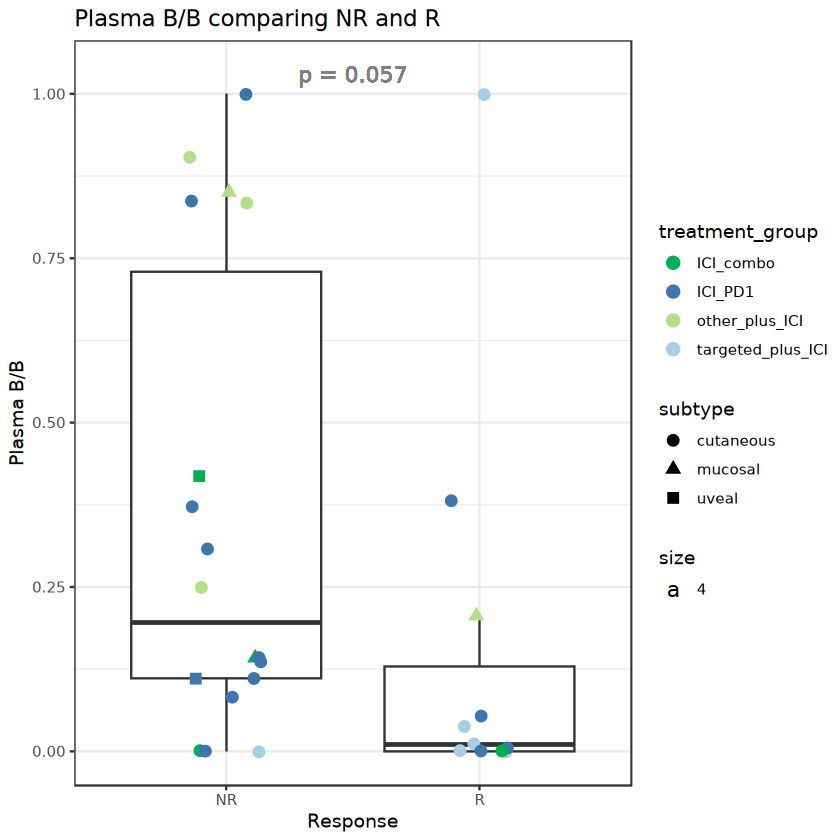

Warning message in geom_text(aes(x = 1.5, y = text_position_y, label = paste0("p = ", :
“All aesthetics have length 1, but the data has 30 rows.
ℹ Did you mean to use `annotate()`?”


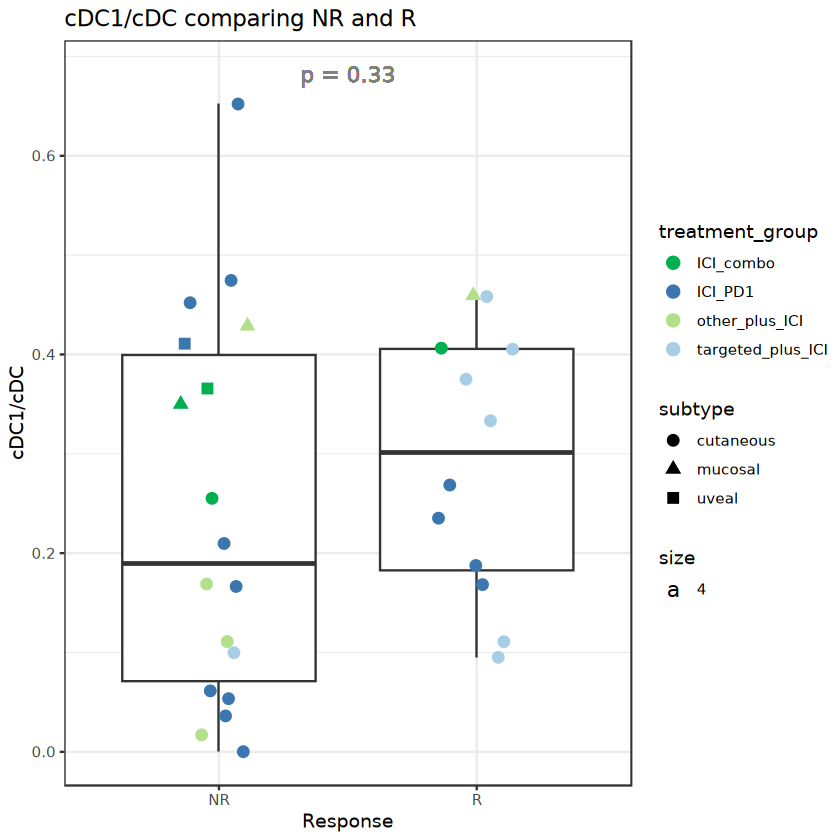

Warning message in geom_text(aes(x = 1.5, y = text_position_y, label = paste0("p = ", :
“All aesthetics have length 1, but the data has 29 rows.
ℹ Did you mean to use `annotate()`?”


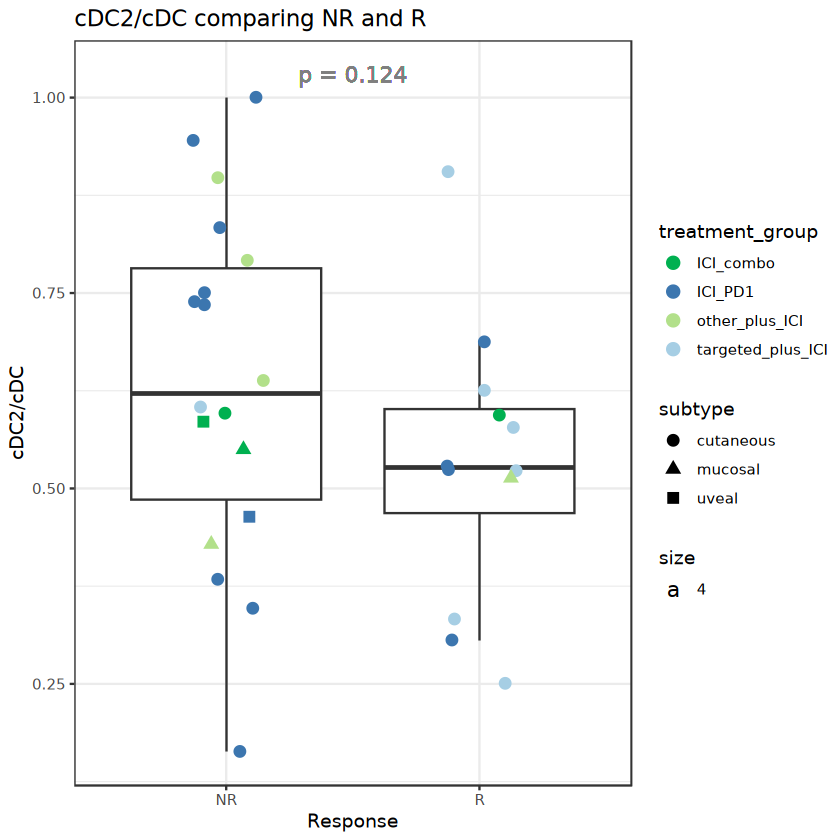

Warning message in geom_text(aes(x = 1.5, y = text_position_y, label = paste0("p = ", :
“All aesthetics have length 1, but the data has 30 rows.
ℹ Did you mean to use `annotate()`?”


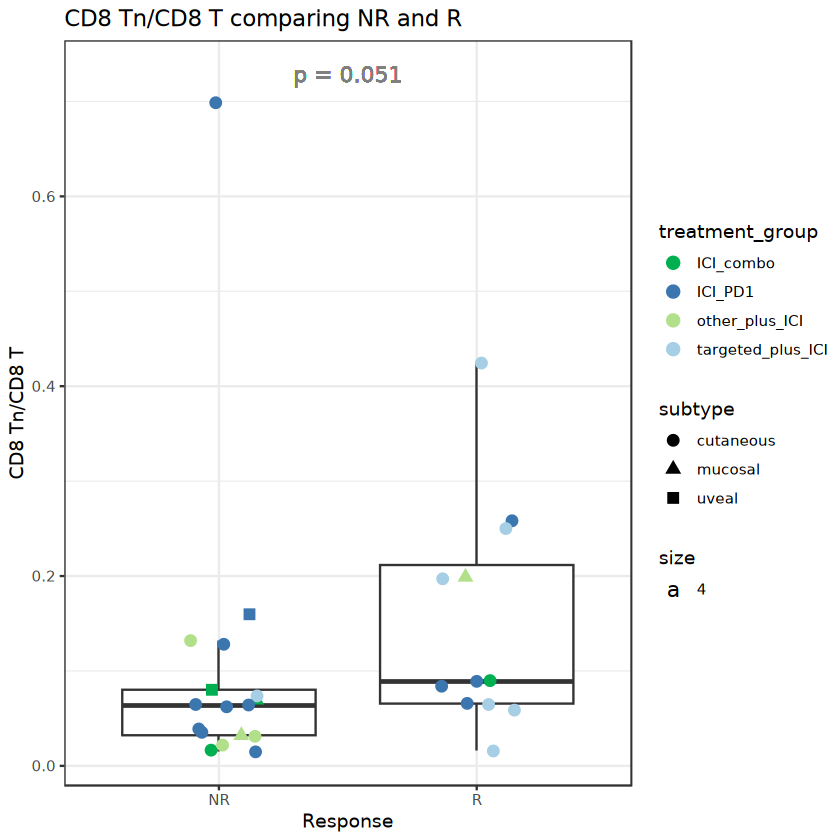

Warning message in geom_text(aes(x = 1.5, y = text_position_y, label = paste0("p = ", :
“All aesthetics have length 1, but the data has 28 rows.
ℹ Did you mean to use `annotate()`?”


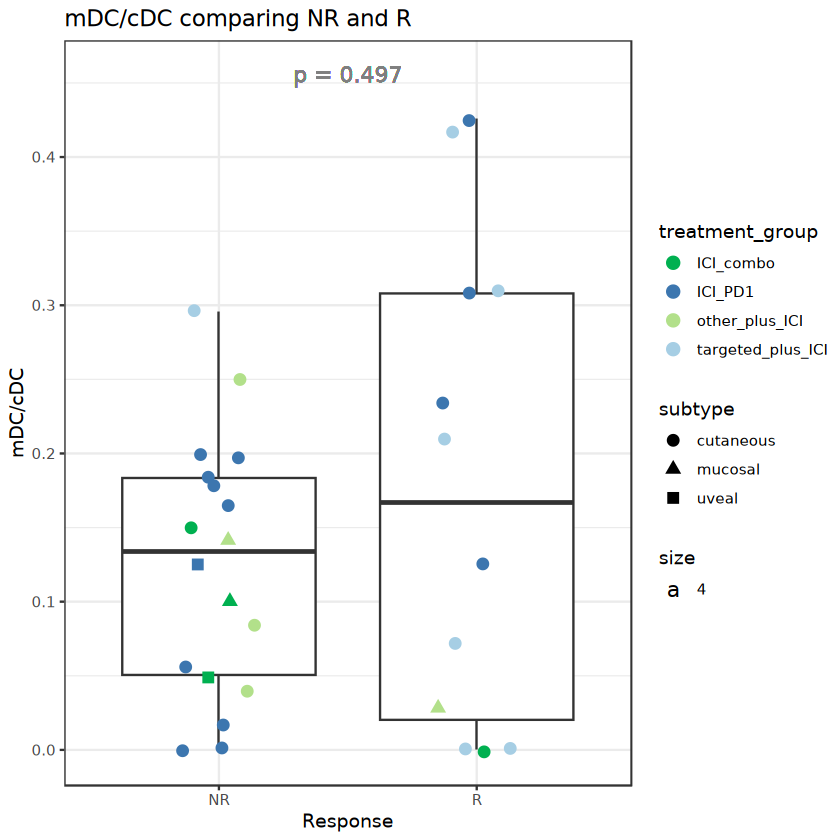

Warning message in geom_text(aes(x = 1.5, y = text_position_y, label = paste0("p = ", :
“All aesthetics have length 1, but the data has 28 rows.
ℹ Did you mean to use `annotate()`?”


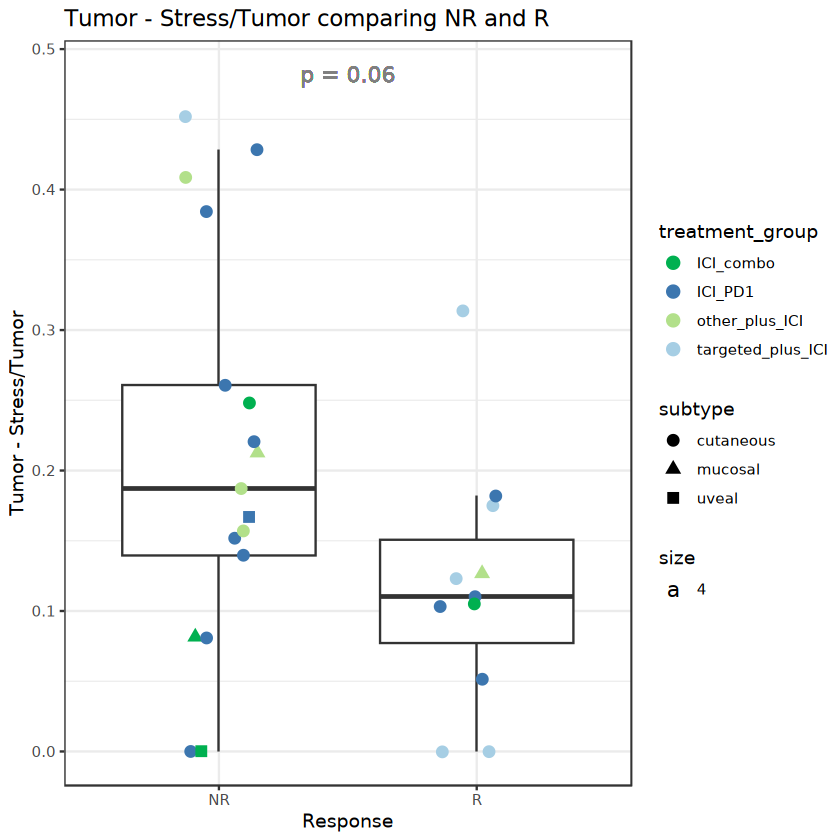

Warning message in geom_text(aes(x = 1.5, y = text_position_y, label = paste0("p = ", :
“All aesthetics have length 1, but the data has 28 rows.
ℹ Did you mean to use `annotate()`?”


$Plasma_B_B

$cDC1_cDC

$cDC2_cDC

$CD8_Tn_CD8_T

$mDC_cDC

$Tumor___Stress_Tumor

$CD4_Tn_CD4_T

$CD4_Treg_CD4_T


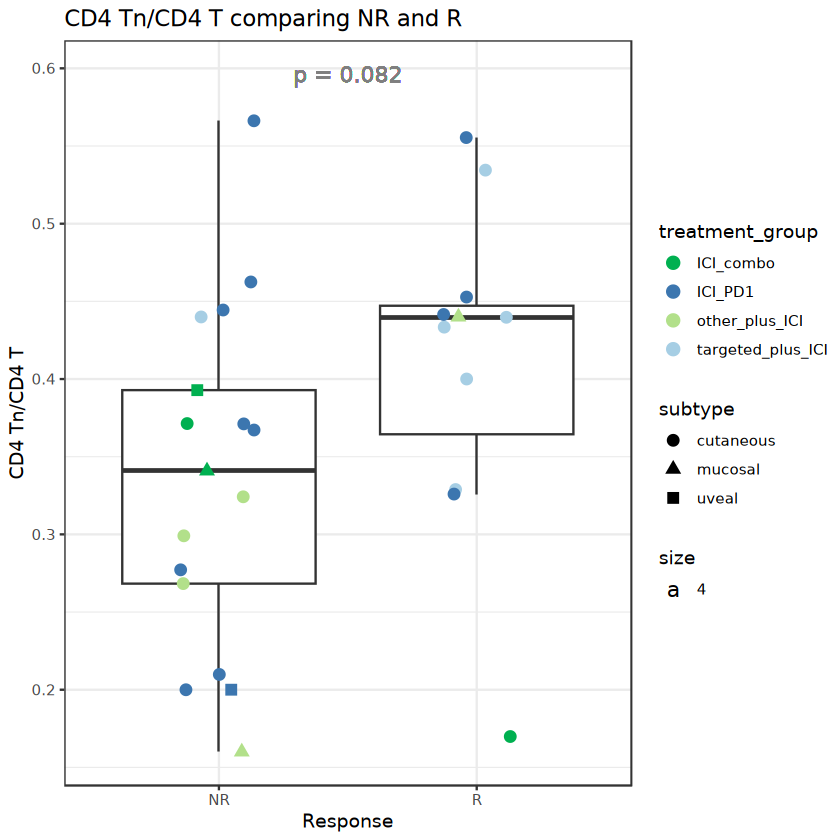

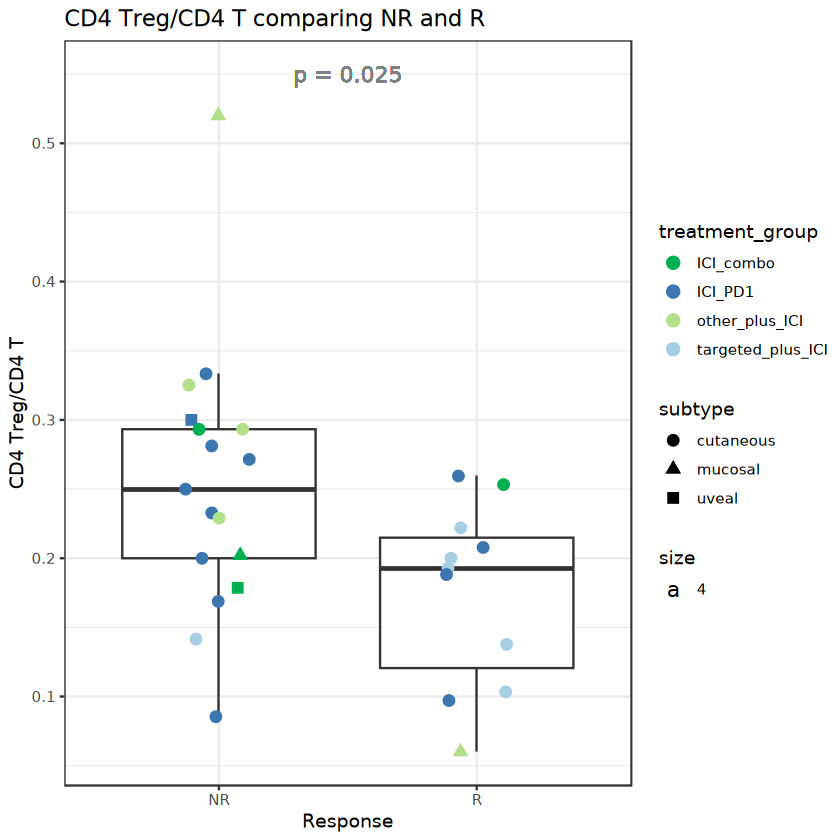

In [73]:
# To plot results that are shown in Supplementary Figure 3A, use "sig_subtyped_to_reannotated_res" 
# To plot all results, replace "sig_subtyped_to_reannotated_res" with "subtyped_to_reannotated_res"

all_plots <- list()
for (i in 1:length(sig_subtyped_to_reannotated_res_w_ICI$prop)) {
    
    plot <- generate_boxplot(merged_props_response_w_ICI, 
                             sig_subtyped_to_reannotated_res_w_ICI[i,], sig_subtyped_to_reannotated_res_w_ICI[i, 'abbr_prop'], 
                    subtype_to_reannotated_titles)
    
    prop <- sig_subtyped_to_reannotated_res_w_ICI[i, 'abbr_prop']
    all_plots[[prop]] <-  plot
}

all_plots

#### 3. only ICI samples

In [74]:
num_nr <- sum(merged_props_response_ICI_only$response_short == 'NR')
num_r <- sum(merged_props_response_ICI_only$response_short == 'R')
num_nr
num_r

[1] 13

[1] 5

In [75]:
subtyped_to_reannotated_res_ICI_only <- get_wilcoxon(merged_props_response_ICI_only, subtype_to_reannotated_colnames, 
                                                   subtype_to_reannotated_titles)

Warning message in wilcox.test.default(nr_samples, r_samples, alternative = "two.sided"):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(nr_samples, r_samples, alternative = "two.sided"):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(nr_samples, r_samples, alternative = "two.sided"):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(nr_samples, r_samples, alternative = "two.sided"):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(nr_samples, r_samples, alternative = "two.sided"):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(nr_samples, r_samples, alternative = "two.sided"):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(nr_samples, r_samples, alternative = "two.sided"):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(nr_samples, r_samples, alternative = "two.si

In [76]:
#generate boxplots for those with p-value < 0.1
subtyped_to_reannotated_res_ICI_only$index <- as.double(rownames(subtyped_to_reannotated_res_ICI_only))
sig_subtyped_to_reannotated_res_ICI_only <- subtyped_to_reannotated_res_ICI_only %>% filter(p_val <= 0.1 | prop %in% c('mDC/cDC', 
                                                   'Macrophage M2/Monocyte/Macrophage', 'Monocyte classical/Monocyte/Macrophage',
                                                  'Tumor - Respiration/Tumor', 'cDC1/cDC', 'cDC2/cDC'))

Warning message in geom_text(aes(x = 1.5, y = text_position_y, label = paste0("p = ", :
“All aesthetics have length 1, but the data has 18 rows.
ℹ Did you mean to use `annotate()`?”
Warning message in geom_text(aes(x = 1.5, y = text_position_y, label = paste0("p = ", :
“All aesthetics have length 1, but the data has 18 rows.
ℹ Did you mean to use `annotate()`?”


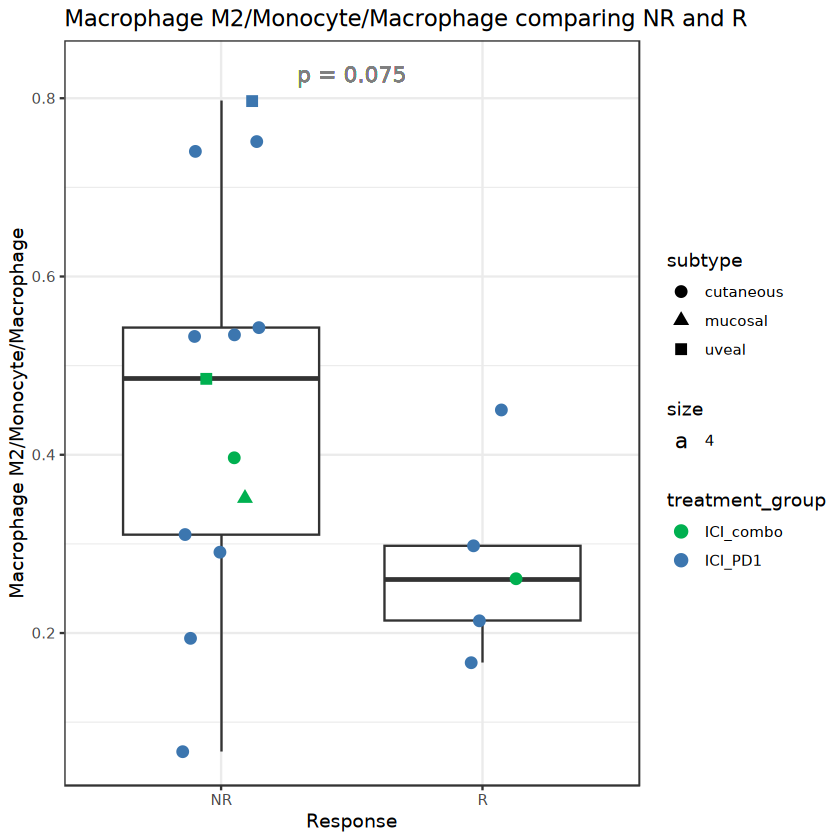

Warning message in geom_text(aes(x = 1.5, y = text_position_y, label = paste0("p = ", :
“All aesthetics have length 1, but the data has 18 rows.
ℹ Did you mean to use `annotate()`?”


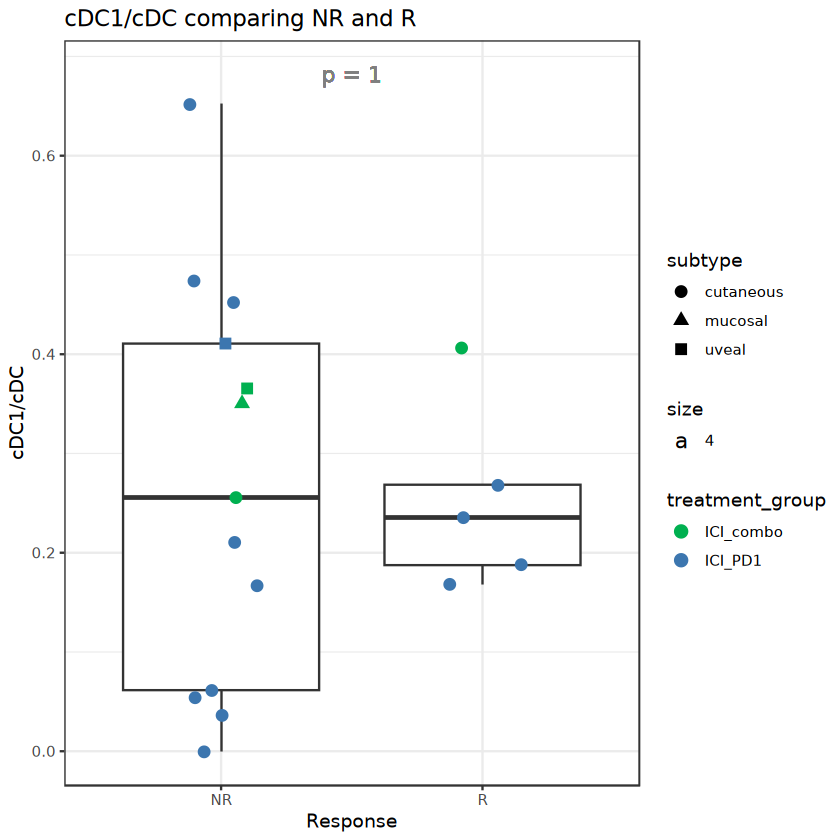

Warning message in geom_text(aes(x = 1.5, y = text_position_y, label = paste0("p = ", :
“All aesthetics have length 1, but the data has 18 rows.
ℹ Did you mean to use `annotate()`?”


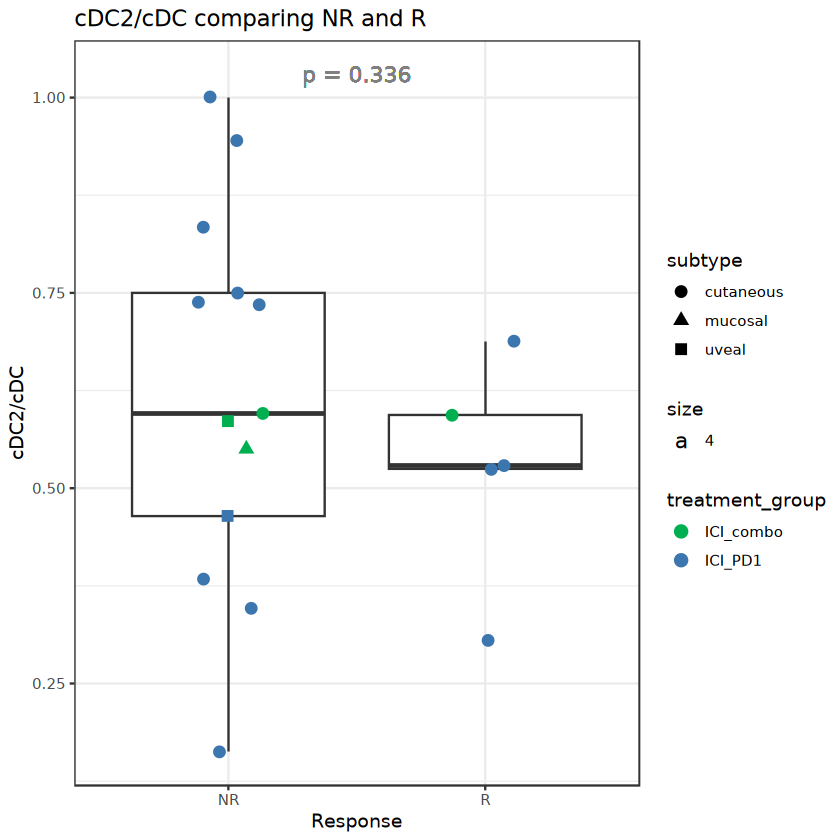

Warning message in geom_text(aes(x = 1.5, y = text_position_y, label = paste0("p = ", :
“All aesthetics have length 1, but the data has 18 rows.
ℹ Did you mean to use `annotate()`?”


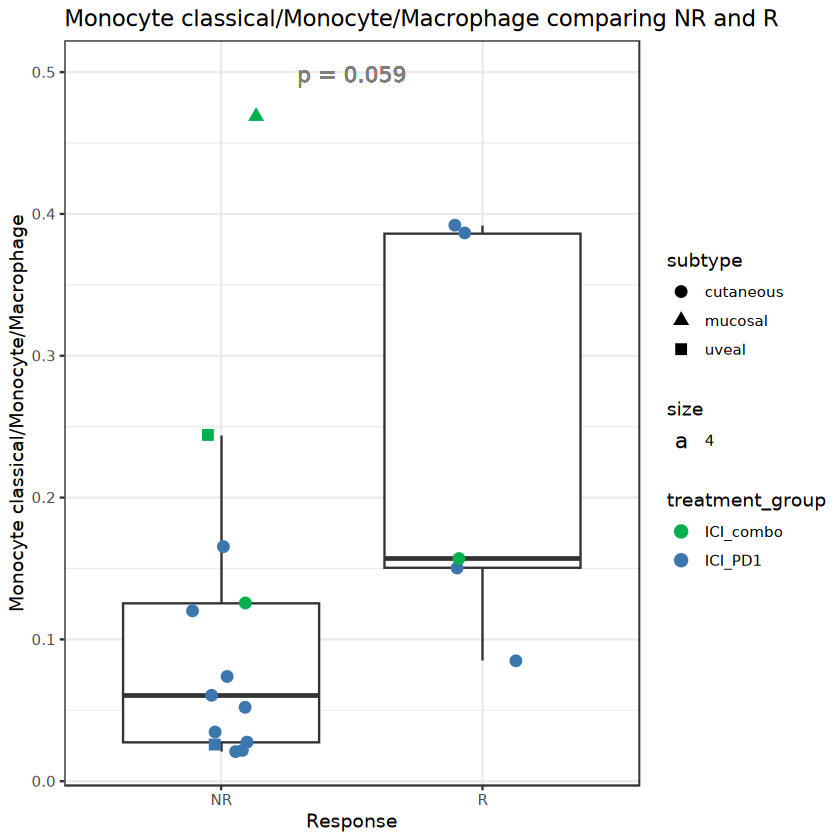

Warning message in geom_text(aes(x = 1.5, y = text_position_y, label = paste0("p = ", :
“All aesthetics have length 1, but the data has 17 rows.
ℹ Did you mean to use `annotate()`?”


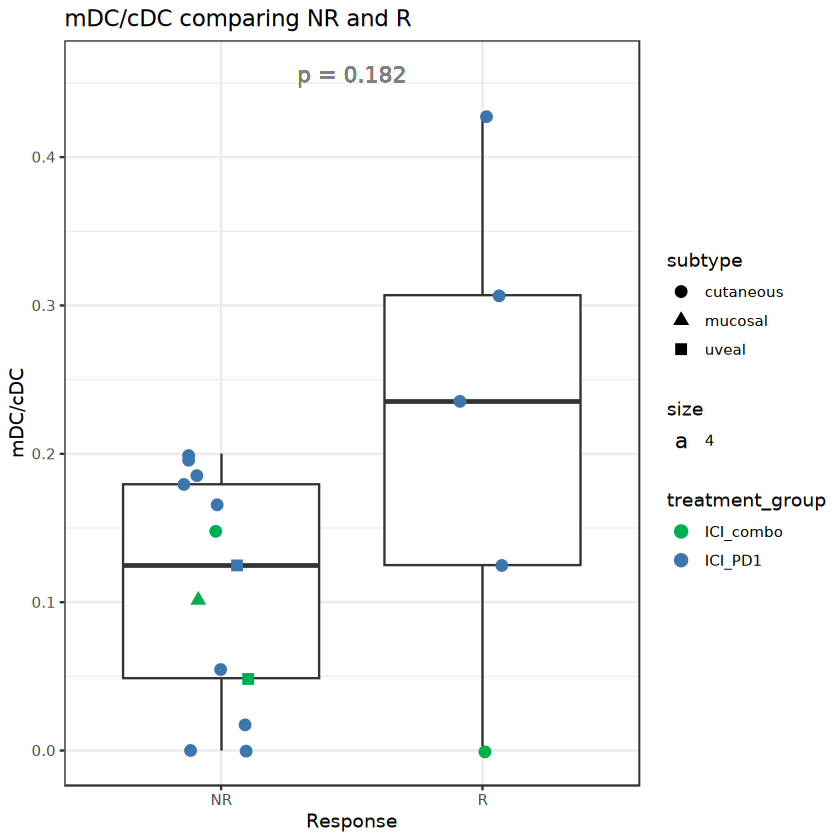

Warning message in geom_text(aes(x = 1.5, y = text_position_y, label = paste0("p = ", :
“All aesthetics have length 1, but the data has 18 rows.
ℹ Did you mean to use `annotate()`?”


$Macrophage_M2_Monocyte_Macrophage

$cDC1_cDC

$cDC2_cDC

$Monocyte_classical_Monocyte_Macrophage

$mDC_cDC

$Tumor___Respiration_Tumor

$Naive_B_B


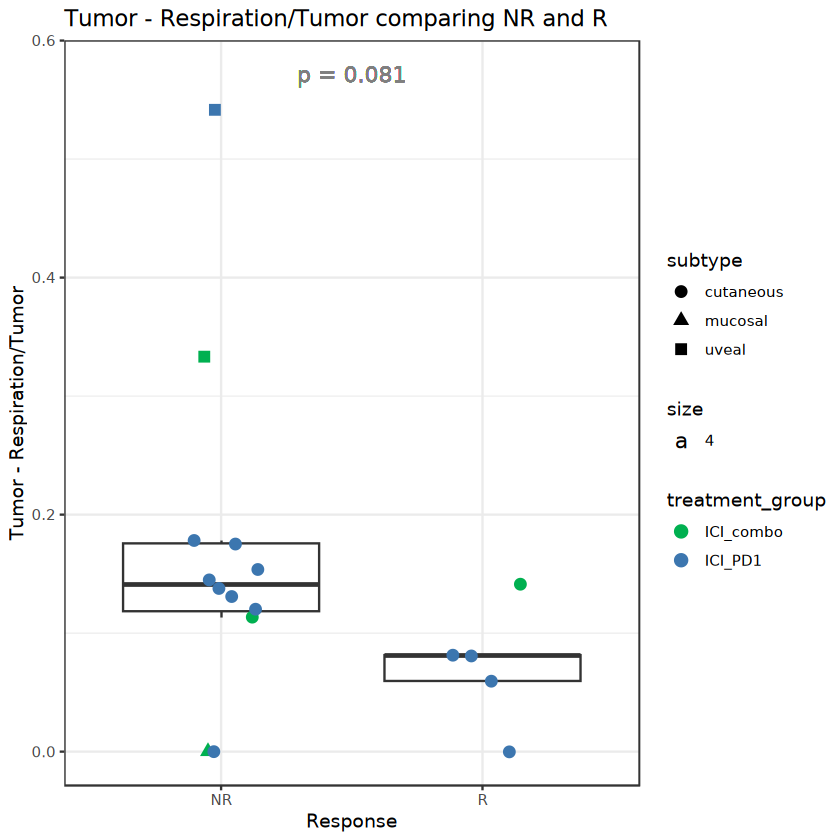

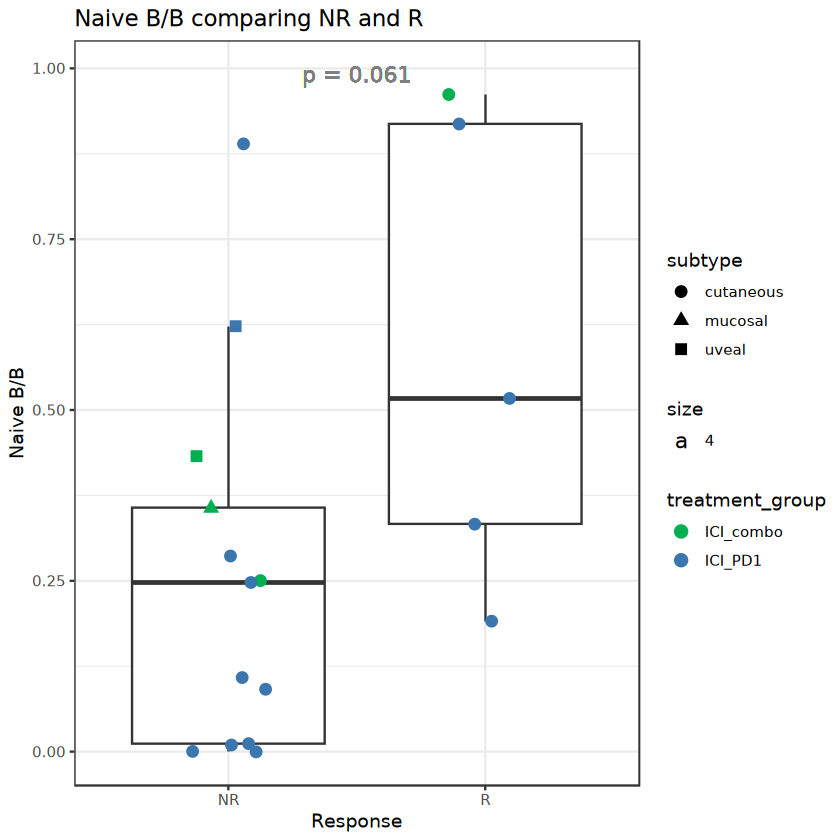

In [78]:
# To plot results that are shown in Figure 3A, use "sig_subtyped_to_reannotated_res" 
# To plot all results, replace "sig_subtyped_to_reannotated_res" with "subtyped_to_reannotated_res"

all_plots <- list()
for (i in 1:length(sig_subtyped_to_reannotated_res_ICI_only$prop)) {
    
    plot <- generate_boxplot(merged_props_response_ICI_only, 
                             sig_subtyped_to_reannotated_res_ICI_only[i,], sig_subtyped_to_reannotated_res_ICI_only[i, 'abbr_prop'], 
                    subtype_to_reannotated_titles)
    
    prop <- sig_subtyped_to_reannotated_res_ICI_only[i, 'abbr_prop']
    all_plots[[prop]] <-  plot
}

all_plots

#### 4. ICI_PD1 samples 

In [87]:
subtyped_to_celltype_res_ICI_PD1 <- get_wilcoxon(merged_props_response_ICI_PD1, subtype_to_reannotated_colnames, 
                                                   subtype_to_reannotated_titles)

Warning message in wilcox.test.default(nr_samples, r_samples, alternative = "two.sided"):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(nr_samples, r_samples, alternative = "two.sided"):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(nr_samples, r_samples, alternative = "two.sided"):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(nr_samples, r_samples, alternative = "two.sided"):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(nr_samples, r_samples, alternative = "two.sided"):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(nr_samples, r_samples, alternative = "two.sided"):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(nr_samples, r_samples, alternative = "two.sided"):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(nr_samples, r_samples, alternative = "two.si

In [88]:
# To plot results that are shown in Extended Data Figure 3A and Supplementary Figure 3A, use "sig_subtyped_to_reannotated_res" 
# To plot all results, replace "sig_subtyped_to_reannotated_res" with "subtyped_to_reannotated_res"

subtyped_to_celltype_res_ICI_PD1$index <- as.double(rownames(subtyped_to_celltype_res_ICI_PD1))
sig_subtyped_to_celltype_res_ICI_PD1 <- subtyped_to_celltype_res_ICI_PD1 %>% filter(p_val <= 0.1 | prop %in% c('mDC/cDC','cDC1/cDC', 'cDC2/cDC') )

Warning message in geom_text(aes(x = 1.5, y = text_position_y, label = paste0("p = ", :
“All aesthetics have length 1, but the data has 14 rows.
ℹ Did you mean to use `annotate()`?”
Warning message in geom_text(aes(x = 1.5, y = text_position_y, label = paste0("p = ", :
“All aesthetics have length 1, but the data has 14 rows.
ℹ Did you mean to use `annotate()`?”


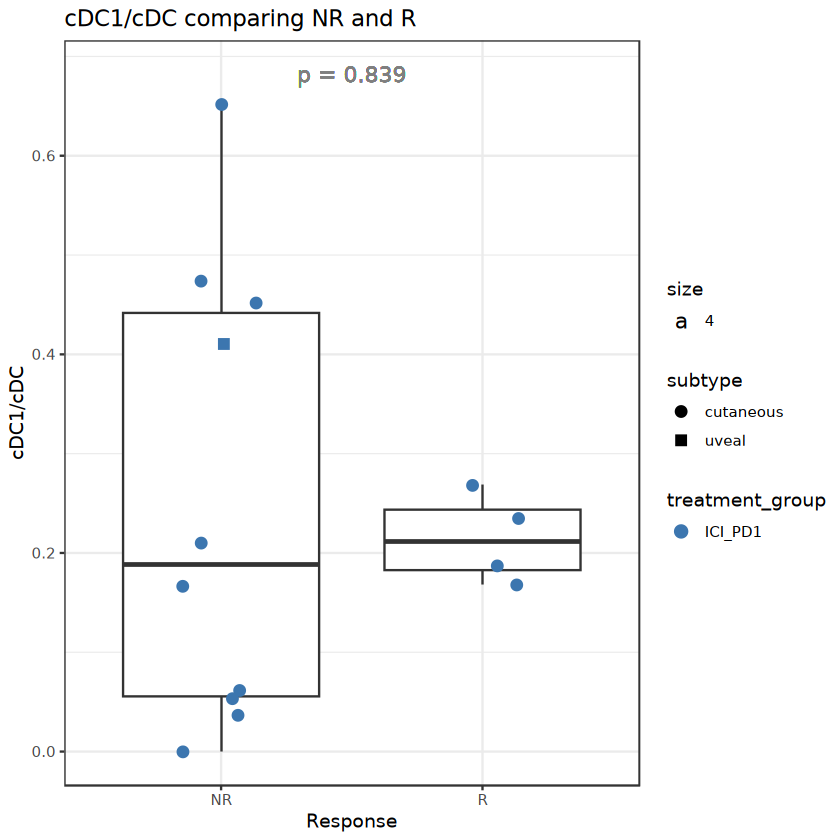

Warning message in geom_text(aes(x = 1.5, y = text_position_y, label = paste0("p = ", :
“All aesthetics have length 1, but the data has 14 rows.
ℹ Did you mean to use `annotate()`?”


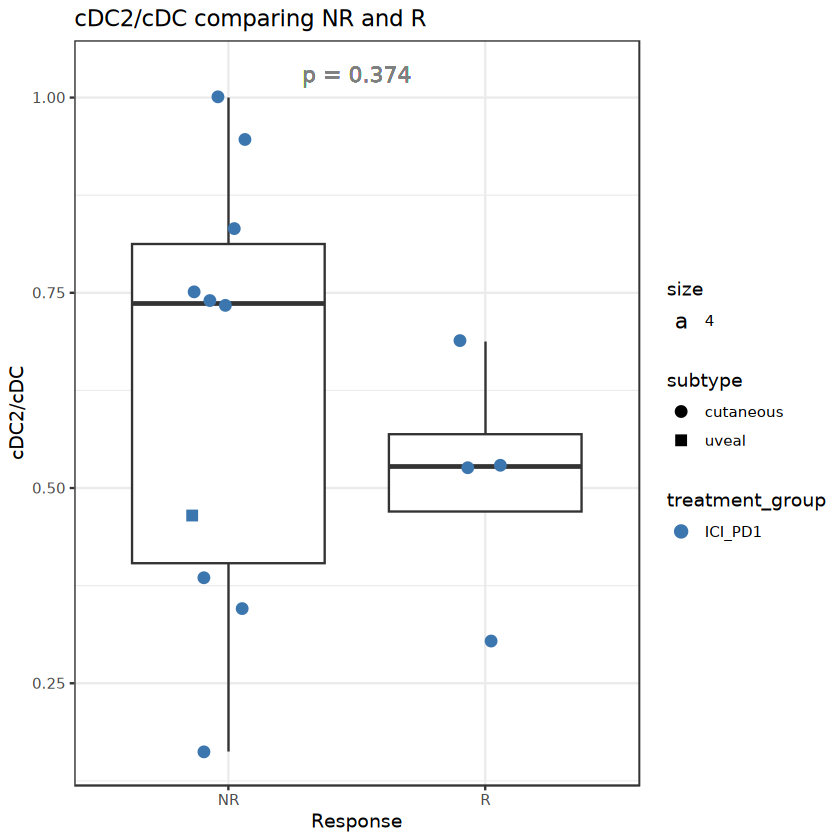

Warning message in geom_text(aes(x = 1.5, y = text_position_y, label = paste0("p = ", :
“All aesthetics have length 1, but the data has 14 rows.
ℹ Did you mean to use `annotate()`?”


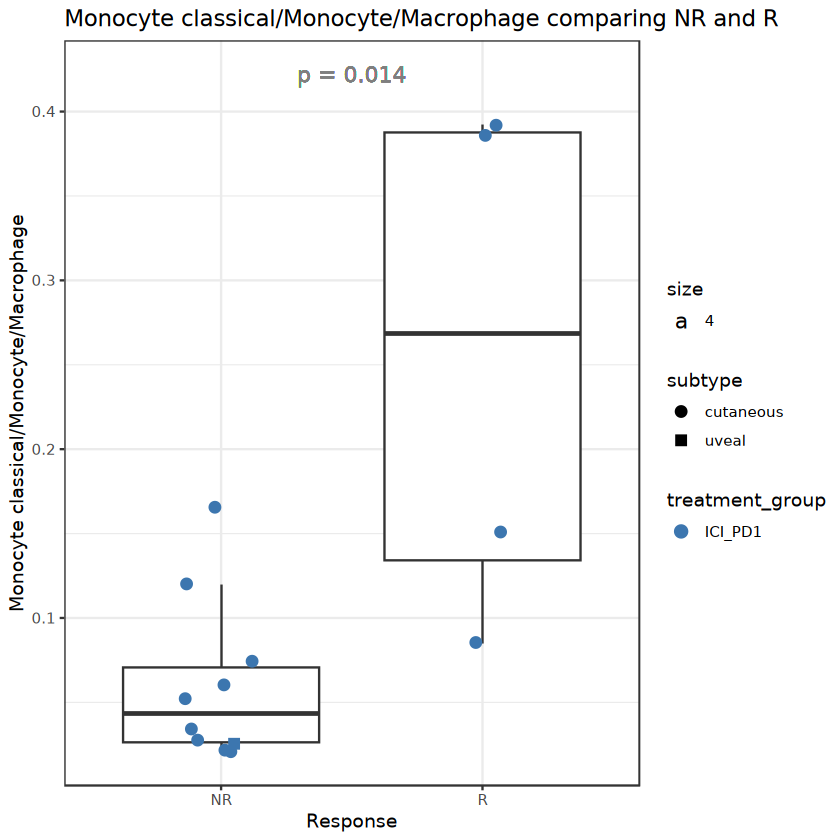

Warning message in geom_text(aes(x = 1.5, y = text_position_y, label = paste0("p = ", :
“All aesthetics have length 1, but the data has 13 rows.
ℹ Did you mean to use `annotate()`?”


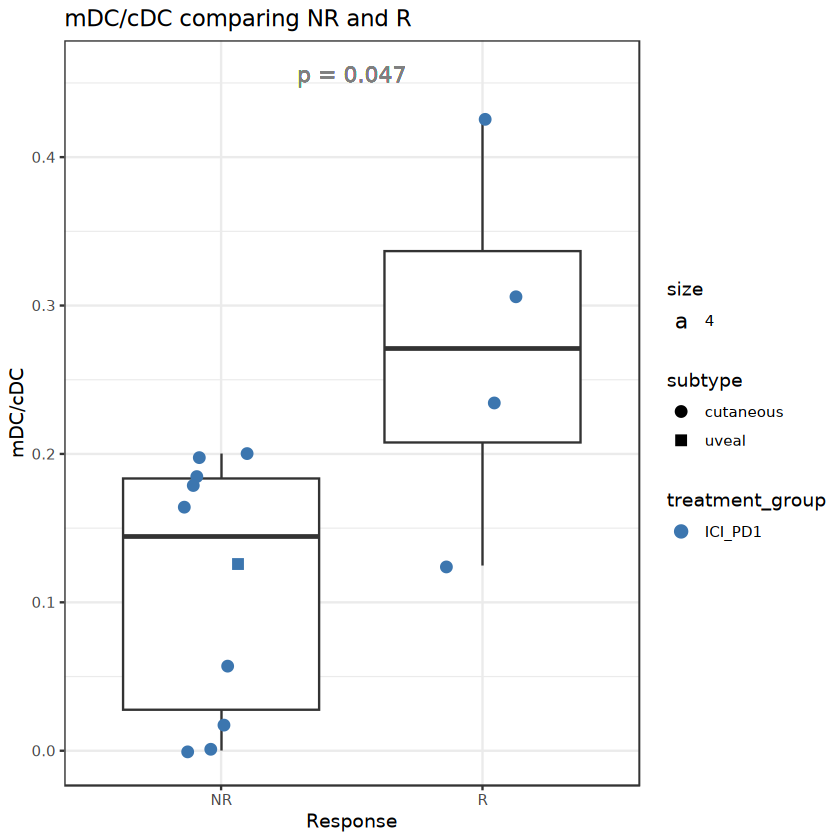

Warning message in geom_text(aes(x = 1.5, y = text_position_y, label = paste0("p = ", :
“All aesthetics have length 1, but the data has 13 rows.
ℹ Did you mean to use `annotate()`?”


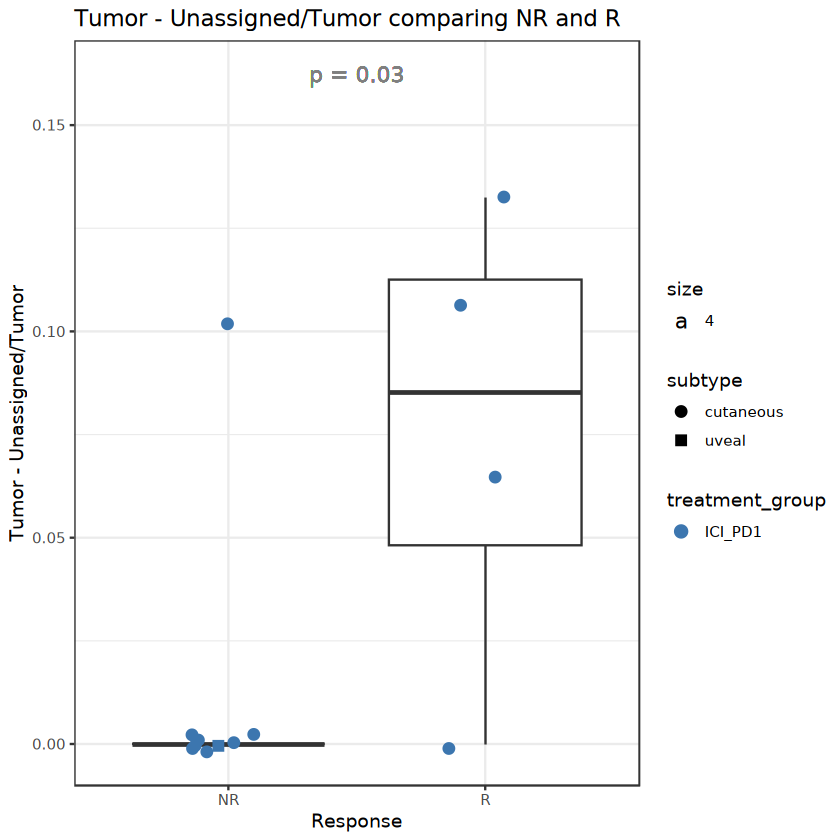

Warning message in geom_text(aes(x = 1.5, y = text_position_y, label = paste0("p = ", :
“All aesthetics have length 1, but the data has 13 rows.
ℹ Did you mean to use `annotate()`?”


$cDC1_cDC

$cDC2_cDC

$Monocyte_classical_Monocyte_Macrophage

$mDC_cDC

$Tumor___Unassigned_Tumor

$Tumor___Respiration_Tumor

$Tumor___Cell_Cycle___G2_M_Tumor


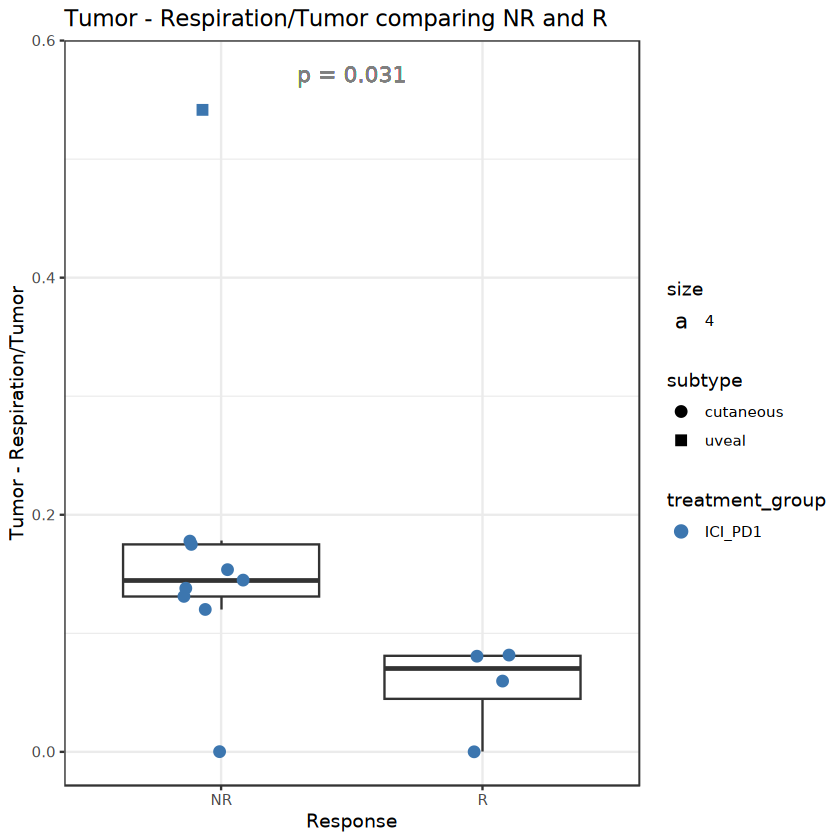

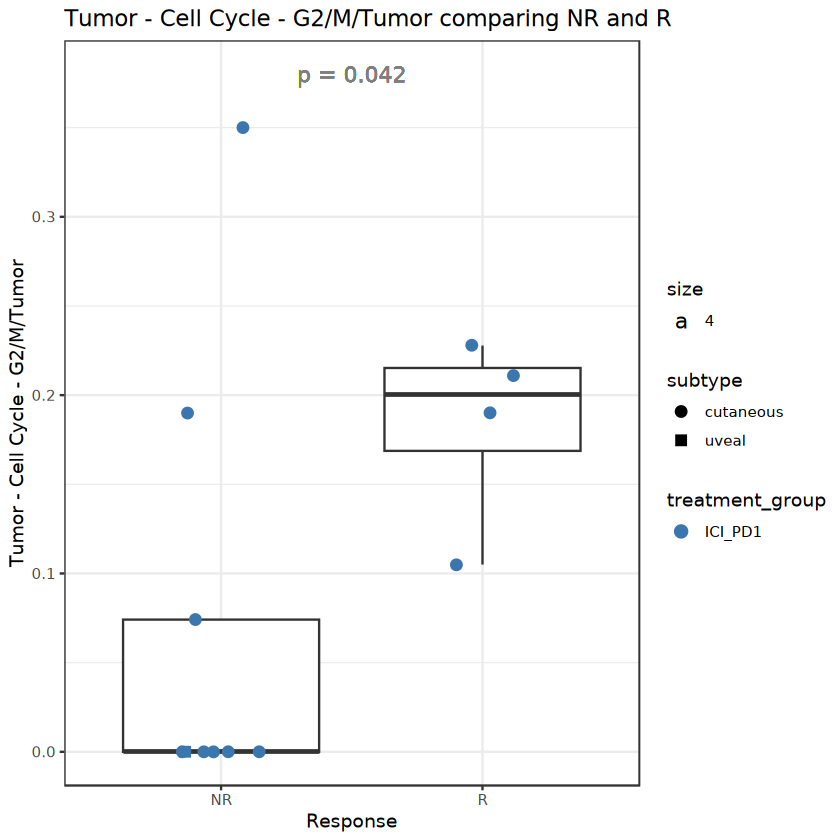

In [89]:
all_plots <- list()
for (i in 1:length(sig_subtyped_to_celltype_res_ICI_PD1$prop)) {
    
    plot <- generate_boxplot(merged_props_response_ICI_PD1, 
                             sig_subtyped_to_celltype_res_ICI_PD1[i,], sig_subtyped_to_celltype_res_ICI_PD1[i, 'abbr_prop'], 
                    subtype_to_reannotated_titles)
    
    prop <- sig_subtyped_to_celltype_res_ICI_PD1[i, 'abbr_prop']
    all_plots[[prop]] <-  plot
}

#dir.create('/home/cbw3/data/figure_generation/Figure3/SuppF3/SF3B_subtype_boxplots/significant_ICI_PD1/')
all_plots

## Cell type proportion boxplots - Supplementary Figure 3D

In [90]:
celltype_proportions <- read.csv("/net/bmc-lab5/data/kellis/group/scCancer2023/objects_for_DC_manuscript/for_public/cohort_relative_celltype_proportions.csv", check.names = FALSE)
colnames(celltype_proportions)[1] <- 'proportion'
head(celltype_proportions)

,proportion,1098_5,1098_4,1098_3,1063_1,946_1,926_1,406_3,978_1,98_1,⋯,776_1,856_1,808_1,1098_1,1224_1,1224_2,406_2,1098_2,452_1,620_2
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,B/B,1.000000000,1.000000000,1.000000000,1.000000000,1.000000000,1.00000000,1.00000000,1.000000000,1.000000000,⋯,1.00000000,1.000000000,1.000000000,NA,NA,1.000000000,1.000000000,1.000000000,1.000000000,1.000000000
2,B/Immune,0.001199041,0.002087683,0.002734108,0.066006601,0.004524887,0.25904551,0.21623576,0.117903930,0.004993758,⋯,0.07105797,0.028571429,0.028017241,0.00000000,0.0000000,0.007861635,0.009140768,0.058315335,0.002063983,0.004571830
3,B/Total,0.001068376,0.000700035,0.001453488,0.003361345,0.000977517,0.22524609,0.17498171,0.002334227,0.000615006,⋯,0.06935271,0.005888951,0.001561937,0.00000000,0.0000000,0.003495892,0.004842615,0.006005338,0.000244091,0.003836506
4,Monocyte/Macrophage/Immune,0.083533173,0.188935282,0.201640465,0.511551155,0.723981900,0.04705882,0.06563009,0.371179039,0.338327091,⋯,0.01646740,0.197278912,0.090517241,0.11351351,0.0781250,0.095911950,0.899451554,0.676025918,0.465772274,0.079655354
5,Monocyte/Macrophage/Total,0.074430199,0.063353168,0.107194767,0.026050420,0.156402737,0.04091874,0.05310900,0.007348491,0.041666667,⋯,0.01607222,0.040661806,0.005046257,0.02468928,0.0396376,0.042649886,0.476513317,0.069617438,0.055083194,0.066843736
6,Endothelial/Endothelial,1.000000000,1.000000000,1.000000000,1.000000000,1.000000000,1.00000000,1.00000000,1.000000000,1.000000000,⋯,1.00000000,1.000000000,1.000000000,1.00000000,1.0000000,1.000000000,1.000000000,1.000000000,1.000000000,1.000000000


In [91]:
#exclude patient 1122_1
celltype_proportions <- celltype_proportions[, colnames(celltype_proportions) != '1122_1']

In [92]:
#transpose cell type
celltype_proportions_T <- as.data.frame(t(celltype_proportions))
colnames(celltype_proportions_T) <- rownames(celltype_proportions)

In [93]:
#rename columns and rownamees
colnames(celltype_proportions_T) <- celltype_proportions_T[1,]
celltype_proportions_T <- celltype_proportions_T[-1,]

celltype_proportions_T$patient_sample <- rownames(celltype_proportions_T)

In [94]:
#change column names, any / or space  --> _ 
colnames(celltype_proportions_T) <- unlist(lapply(colnames(celltype_proportions_T), function(x) gsub('/', '_', x)))
colnames(celltype_proportions_T) <- unlist(lapply(colnames(celltype_proportions_T), function(x) gsub(' ', '_', x)))
colnames(celltype_proportions_T) <- unlist(lapply(colnames(celltype_proportions_T), function(x) gsub('-', '_', x)))
colnames(celltype_proportions_T) <- unlist(lapply(colnames(celltype_proportions_T), function(x) gsub(paste(c("[(]", "[)]", '[+]'), collapse = "|"), '', x)))
#colnames(celltype_proportions_T) <- unlist(lapply(colnames(celltype_proportions_T), function(x) gsub("O","o", x)))


In [95]:
#merge cell type proportions to clinical data
merged_props_response <- merge(celltype_proportions_T, clinical_metadata, by= 'patient_sample')
merged_props_response <- merged_props_response %>% mutate(ICI_status=factor(ICI_status, levels = c("none", "with", "only"))) %>% arrange(ICI_status)

In [112]:
merged_props_response_w_ICI <- merged_props_response[merged_props_response$with_ICI == 'yes',]
merged_props_response_ICI_only <- merged_props_response[merged_props_response$ICI_only == 'yes',]
merged_props_response_ICI_PD1 <- merged_props_response[merged_props_response$treatment_group == 'ICI_PD1',]

### 1. cell type to compartment proportions

In [97]:
celltype_to_compartment_titles <- unique(paste0(celltype_mapping$reannotated, "/",celltype_mapping$compartment))
#change column names, any / or space  --> _ 
celltype_to_compartment_colnames <- unlist(lapply(celltype_to_compartment_titles, function(x) gsub(paste(c('/', ' ', '-'), collapse = '|'), '_', x)))
celltype_to_compartment_colnames <- unlist(lapply(celltype_to_compartment_colnames, function(x) gsub(paste(c("[(]", "[)]", '[+]'), collapse = "|"), '', x)))

In [98]:
celltype_to_compartment_titles

[1] "B/Immune"                   "Monocyte/Macrophage/Immune"
 [3] "Endothelial/Stromal"        "cDC/Immune"                
 [5] "Fibroblast/Stromal"         "Other T/Immune"            
 [7] "pDC/Immune"                 "NK/Immune"                 
 [9] "CD8 T/Immune"               "Cycling T/Immune"          
[11] "Tumor/Tumor"                "Keratinocyte/Stromal"      
[13] "CD4 T/Immune"               "Mast/Immune"

### 2. cell type to total

In [99]:
celltype_to_total_titles <- unique(paste0(celltype_mapping$reannotated, "/","Total"))
#change column names, any / or space  --> _ 
celltype_to_total_colnames <- unlist(lapply(celltype_to_total_titles, function(x) gsub(paste(c('/', ' ', '-'), collapse = '|'), '_', x)))
celltype_to_total_colnames <- unlist(lapply(celltype_to_total_colnames, function(x) gsub(paste(c("[(]", "[)]", '[+]'), collapse = "|"), '', x)))

#### 1. all samples

In [100]:
celltype_to_compartment_res <- get_wilcoxon(merged_props_response, celltype_to_compartment_colnames, celltype_to_compartment_titles)
#write.csv(celltype_to_compartment_res, './SuppF3/SF3A_celltype_results/celltype_to_compartment_props_res.csv')

Warning message in wilcox.test.default(nr_samples, r_samples, alternative = "two.sided"):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(nr_samples, r_samples, alternative = "two.sided"):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(nr_samples, r_samples, alternative = "two.sided"):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(nr_samples, r_samples, alternative = "two.sided"):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(nr_samples, r_samples, alternative = "two.sided"):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(nr_samples, r_samples, alternative = "two.sided"):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(nr_samples, r_samples, alternative = "two.sided"):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(nr_samples, r_samples, alternative = "two.si

Warning message in geom_text(aes(x = 1.5, y = text_position_y, label = paste0("p = ", :
“All aesthetics have length 1, but the data has 38 rows.
ℹ Did you mean to use `annotate()`?”


$cDC_Immune


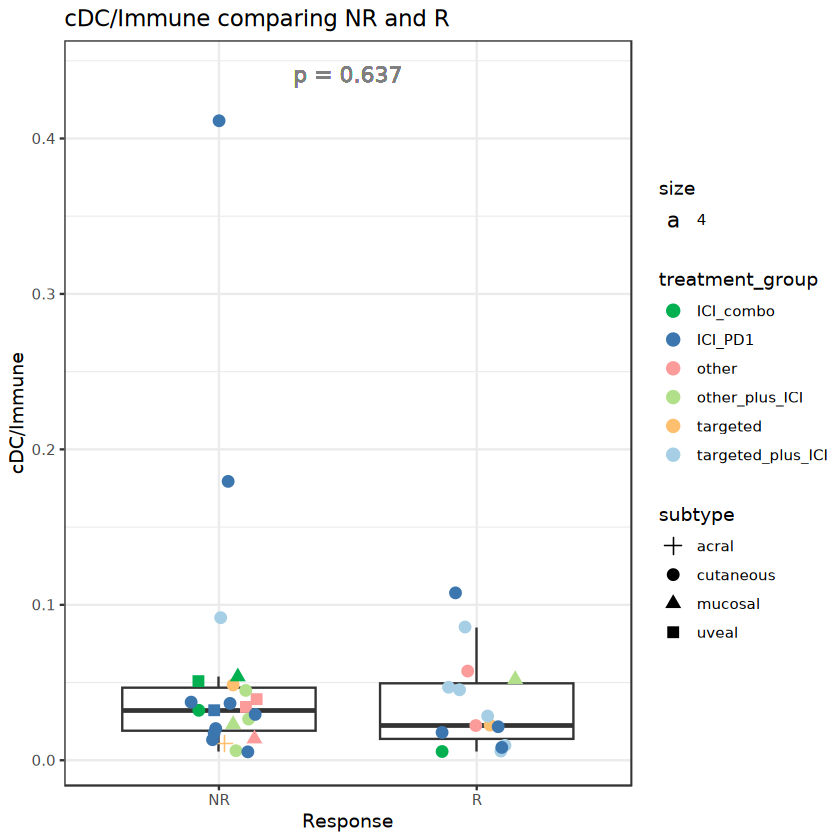

In [101]:
# SUPPLEMENTARY FIGURE 3D: cDC out of immune results

celltype_to_compartment_res$index <- as.double(rownames(celltype_to_compartment_res))
sig_celltype_to_compartment_res<- celltype_to_compartment_res %>% filter(p_val <= 0.1 |prop == 'cDC/Immune' )
 
all_plots <- list()
for (i in 1:length(sig_celltype_to_compartment_res$prop)) {
    
    plot <- generate_boxplot(merged_props_response, 
                             sig_celltype_to_compartment_res[i,], sig_celltype_to_compartment_res[i, 'abbr_prop'], 
                    celltype_to_compartment_titles)
    
    prop <- sig_celltype_to_compartment_res[i, 'abbr_prop']
    all_plots[[prop]] <-  plot
}

all_plots

Warning message in wilcox.test.default(nr_samples, r_samples, alternative = "two.sided"):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(nr_samples, r_samples, alternative = "two.sided"):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(nr_samples, r_samples, alternative = "two.sided"):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(nr_samples, r_samples, alternative = "two.sided"):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(nr_samples, r_samples, alternative = "two.sided"):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(nr_samples, r_samples, alternative = "two.sided"):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(nr_samples, r_samples, alternative = "two.sided"):
“cannot compute exact p-value with ties”
Warning message in geom_text(aes(x = 1.5, y = text_position_y, label = paste0("p = 

$cDC_Total


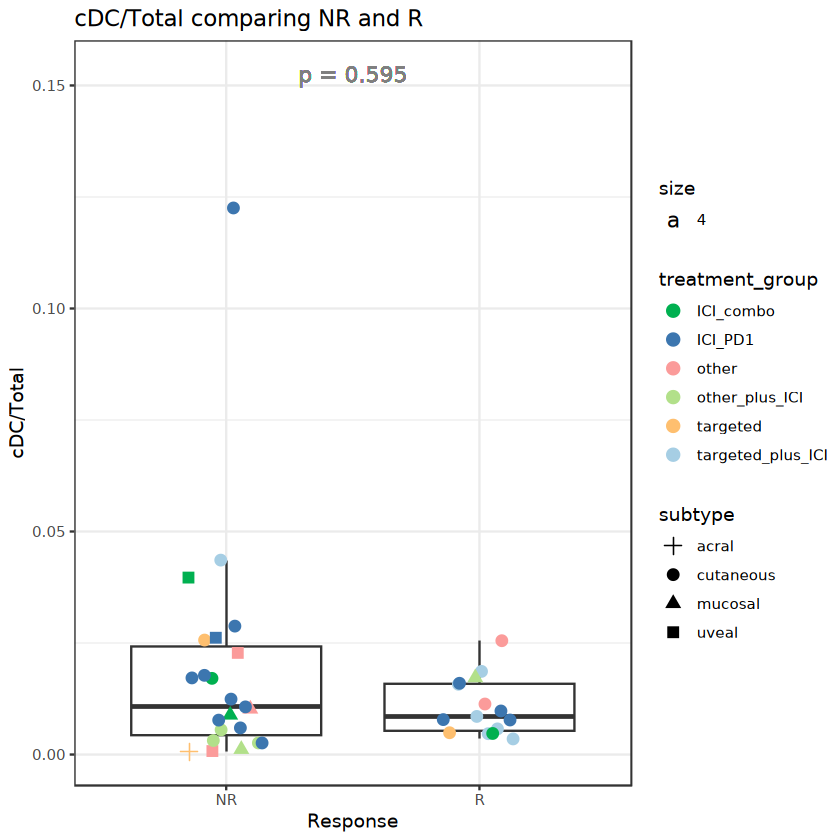

In [102]:
# SUPPLEMENTARY FIGURE 3D: cDC out of total results

#celltype to total
celltype_to_total_res <- get_wilcoxon(merged_props_response, celltype_to_total_colnames, celltype_to_total_titles)

#significant values
celltype_to_total_res$index <- as.double(rownames(celltype_to_total_res))
sig_celltype_to_total_res<- celltype_to_total_res %>% filter(p_val <= 0.1 |prop == 'cDC/Total' )
 
all_plots <- list()
for (i in 1:length(sig_celltype_to_total_res$prop)) {
    
    plot <- generate_boxplot(merged_props_response, 
                             sig_celltype_to_total_res[i,], sig_celltype_to_total_res[i, 'abbr_prop'], 
                    celltype_to_total_titles)
    
    prop <- sig_celltype_to_total_res[i, 'abbr_prop']
    all_plots[[prop]] <-  plot
}

all_plots

#### 2. with ICI samples

In [104]:
celltype_to_compartment_res_w_ICI <- get_wilcoxon(merged_props_response_w_ICI, celltype_to_compartment_colnames, celltype_to_compartment_titles)

Warning message in wilcox.test.default(nr_samples, r_samples, alternative = "two.sided"):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(nr_samples, r_samples, alternative = "two.sided"):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(nr_samples, r_samples, alternative = "two.sided"):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(nr_samples, r_samples, alternative = "two.sided"):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(nr_samples, r_samples, alternative = "two.sided"):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(nr_samples, r_samples, alternative = "two.sided"):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(nr_samples, r_samples, alternative = "two.sided"):
“cannot compute exact p-value with ties”


[1] "cDC_Immune"


Warning message in geom_text(aes(x = 1.5, y = text_position_y, label = paste0("p = ", :
“All aesthetics have length 1, but the data has 30 rows.
ℹ Did you mean to use `annotate()`?”


$cDC_Immune


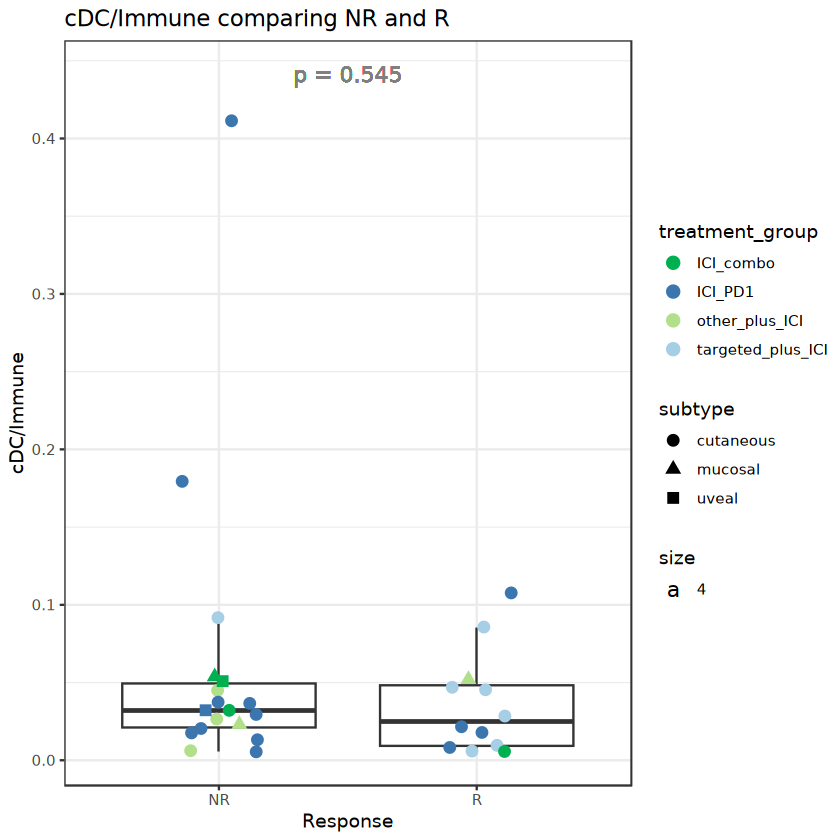

In [106]:
#generate boxplots for those with p-value < 0.1
celltype_to_compartment_res_w_ICI$index <- as.double(rownames(celltype_to_compartment_res_w_ICI))
sig_celltype_to_compartment_res_w_ICI <- celltype_to_compartment_res_w_ICI %>% filter(p_val <= 0.1 |prop == 'cDC/Immune')

#pval < 0.1
#generate boxplots for those with p-value < 0.1
all_plots <- list()
for (i in 1:length(sig_celltype_to_compartment_res_w_ICI$prop)) {
    
    plot <- generate_boxplot(merged_props_response_w_ICI, 
                             sig_celltype_to_compartment_res_w_ICI[i,], sig_celltype_to_compartment_res_w_ICI[i, 'abbr_prop'], 
                    celltype_to_compartment_titles)
    
    prop <- sig_celltype_to_compartment_res[i, 'abbr_prop']
    print(prop)
    all_plots[[prop]] <-  plot
}

all_plots

In [107]:
celltype_to_total_res_w_ICI <- get_wilcoxon(merged_props_response_w_ICI, celltype_to_total_colnames, celltype_to_total_titles)

Warning message in wilcox.test.default(nr_samples, r_samples, alternative = "two.sided"):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(nr_samples, r_samples, alternative = "two.sided"):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(nr_samples, r_samples, alternative = "two.sided"):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(nr_samples, r_samples, alternative = "two.sided"):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(nr_samples, r_samples, alternative = "two.sided"):
“cannot compute exact p-value with ties”


Warning message in geom_text(aes(x = 1.5, y = text_position_y, label = paste0("p = ", :
“All aesthetics have length 1, but the data has 30 rows.
ℹ Did you mean to use `annotate()`?”


$cDC_Total


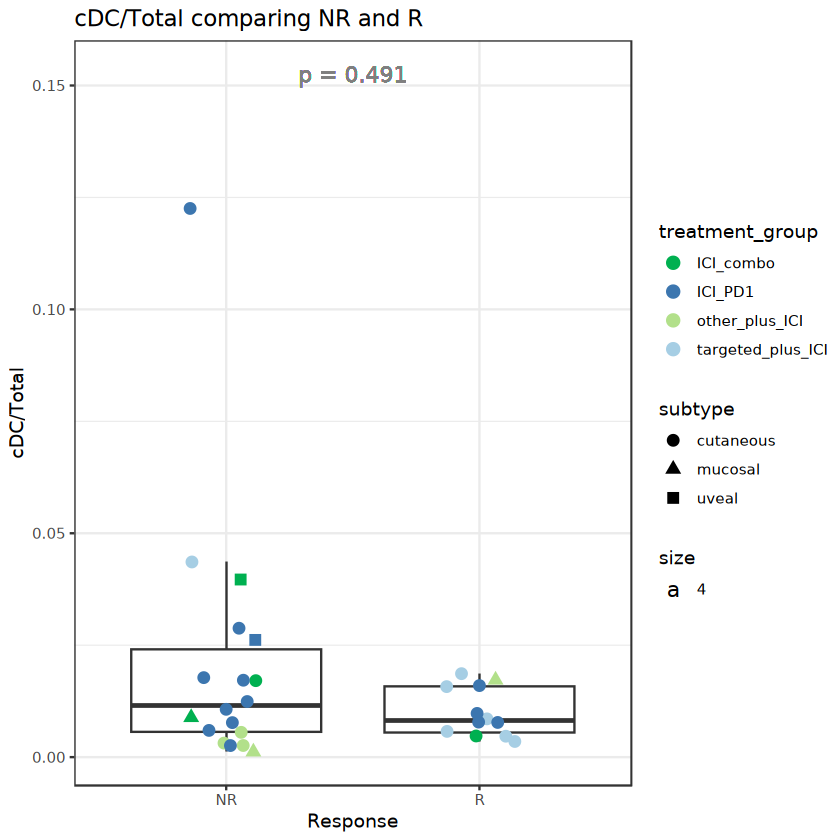

In [108]:
#generate boxplots for those with p-value < 0.1
celltype_to_total_res_w_ICI$index <- as.double(rownames(celltype_to_total_res_w_ICI))
sig_celltype_to_total_res_w_ICI <- celltype_to_total_res_w_ICI %>% filter(p_val < 0.1 | prop == 'cDC/Total')

all_plots <- list()
for (i in 1:length(sig_celltype_to_total_res_w_ICI$prop)) {
    
    plot <- generate_boxplot(merged_props_response_w_ICI, 
                             sig_celltype_to_total_res_w_ICI[i,], sig_celltype_to_total_res_w_ICI[i, 'abbr_prop'], 
                    celltype_to_total_titles)
    
    prop <- sig_celltype_to_total_res_w_ICI[i, 'abbr_prop']
    all_plots[[prop]] <-  plot
}

all_plots

#### 3. ICI only 

Warning message in wilcox.test.default(nr_samples, r_samples, alternative = "two.sided"):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(nr_samples, r_samples, alternative = "two.sided"):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(nr_samples, r_samples, alternative = "two.sided"):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(nr_samples, r_samples, alternative = "two.sided"):
“cannot compute exact p-value with ties”
Warning message in geom_text(aes(x = 1.5, y = text_position_y, label = paste0("p = ", :
“All aesthetics have length 1, but the data has 18 rows.
ℹ Did you mean to use `annotate()`?”
Warning message in geom_text(aes(x = 1.5, y = text_position_y, label = paste0("p = ", :
“All aesthetics have length 1, but the data has 18 rows.
ℹ Did you mean to use `annotate()`?”


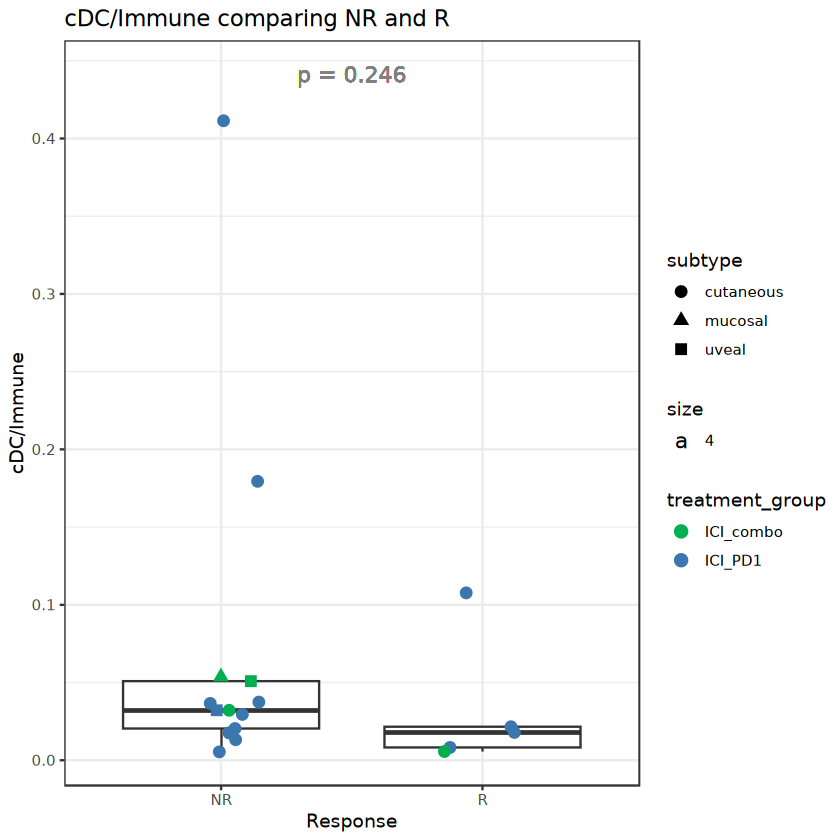

Warning message in geom_text(aes(x = 1.5, y = text_position_y, label = paste0("p = ", :
“All aesthetics have length 1, but the data has 18 rows.
ℹ Did you mean to use `annotate()`?”


$cDC_Immune

$Fibroblast_Stromal

$pDC_Immune


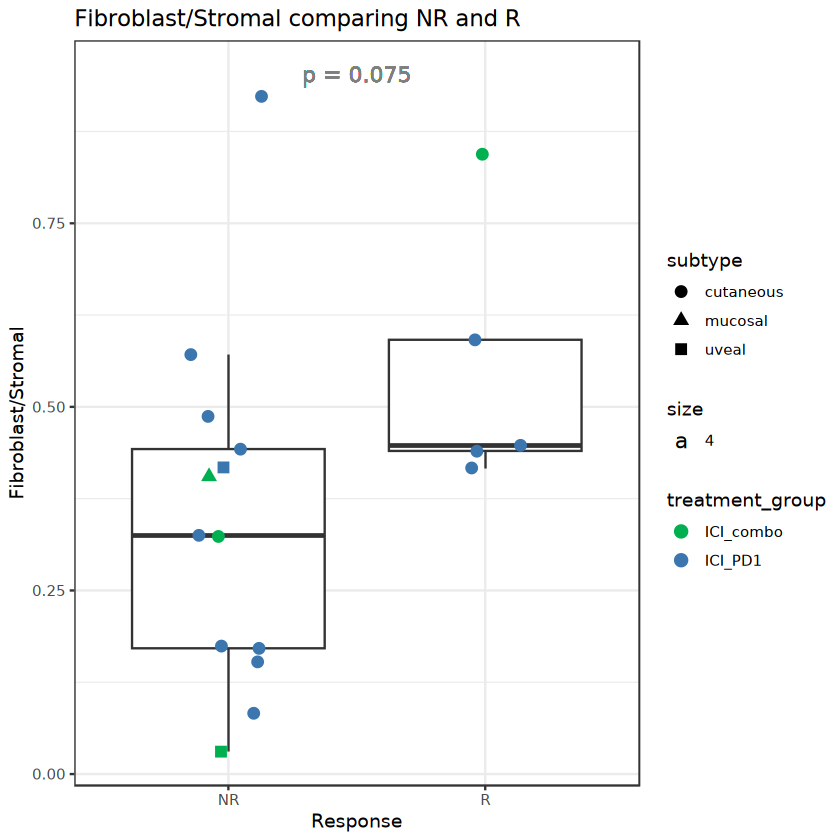

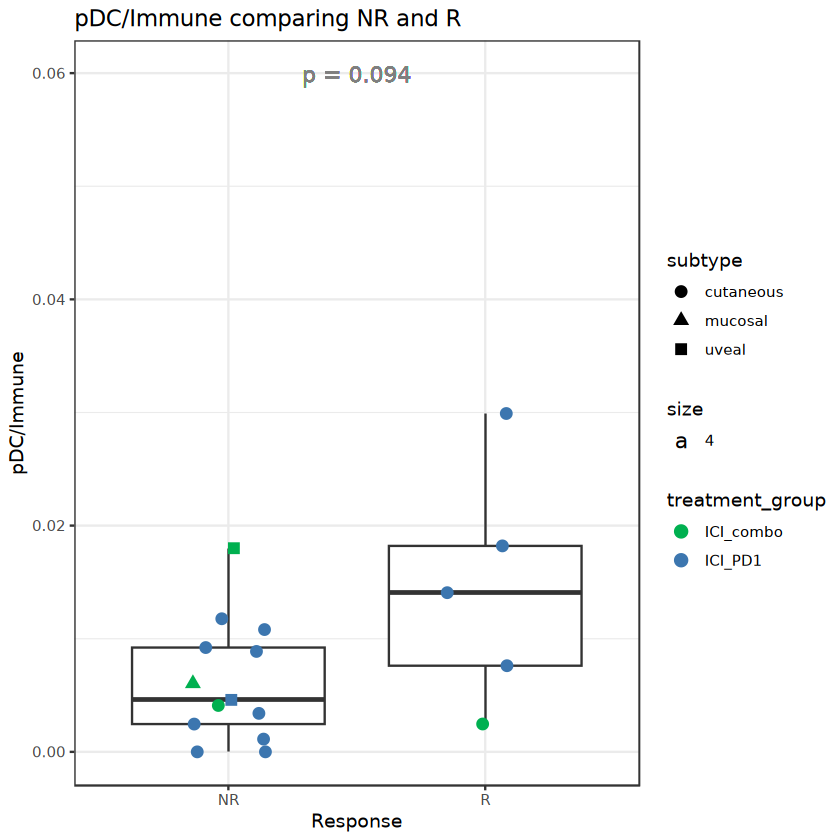

In [109]:
celltype_to_compartment_res_ICI_only <- get_wilcoxon(merged_props_response_ICI_only, celltype_to_compartment_colnames, celltype_to_compartment_titles)

#generate boxplots for those with p-value < 0.1
celltype_to_compartment_res_ICI_only$index <- as.double(rownames(celltype_to_compartment_res_ICI_only))
sig_celltype_to_compartment_res_ICI_only <- celltype_to_compartment_res_ICI_only %>% filter(prop == 'cDC/Immune' | p_val < 0.1)

all_plots <- list()
for (i in 1:length(sig_celltype_to_compartment_res_ICI_only$prop)) {
    
    plot <- generate_boxplot(merged_props_response_ICI_only, 
                             sig_celltype_to_compartment_res_ICI_only[i,], sig_celltype_to_compartment_res_ICI_only[i, 'abbr_prop'], 
                    celltype_to_compartment_titles)
    
    prop <- sig_celltype_to_compartment_res_ICI_only[i, 'abbr_prop']
    all_plots[[prop]] <-  plot
}

all_plots

Warning message in wilcox.test.default(nr_samples, r_samples, alternative = "two.sided"):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(nr_samples, r_samples, alternative = "two.sided"):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(nr_samples, r_samples, alternative = "two.sided"):
“cannot compute exact p-value with ties”
Warning message in geom_text(aes(x = 1.5, y = text_position_y, label = paste0("p = ", :
“All aesthetics have length 1, but the data has 18 rows.
ℹ Did you mean to use `annotate()`?”
Warning message in geom_text(aes(x = 1.5, y = text_position_y, label = paste0("p = ", :
“All aesthetics have length 1, but the data has 18 rows.
ℹ Did you mean to use `annotate()`?”


$Endothelial_Total

$cDC_Total


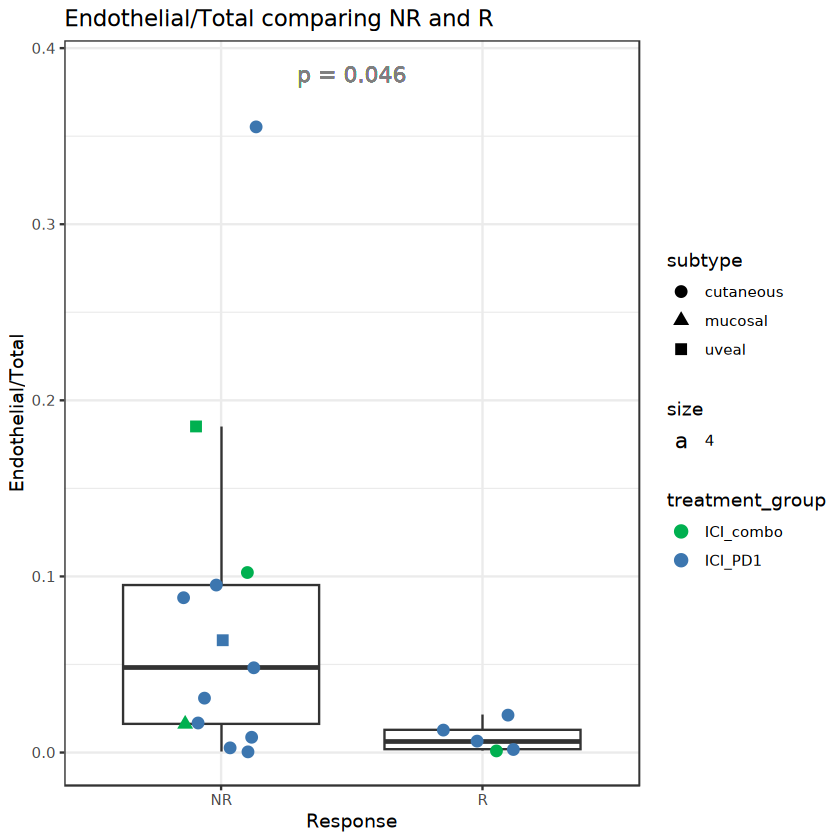

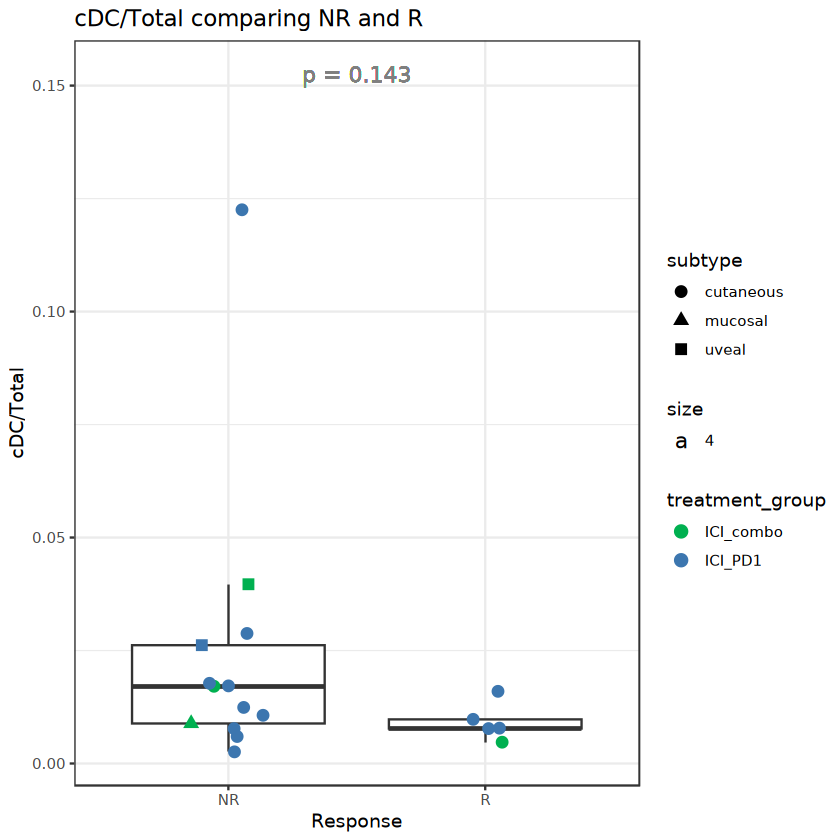

In [110]:
celltype_to_total_res_ICI_only <- get_wilcoxon(merged_props_response_ICI_only, celltype_to_total_colnames, celltype_to_total_titles)

#generate boxplots for those with p-value < 0.1
celltype_to_total_res_ICI_only$index <- as.double(rownames(celltype_to_total_res_ICI_only))
sig_celltype_to_total_res_ICI_only <- celltype_to_total_res_ICI_only %>% filter(p_val < 0.1|prop == 'cDC/Total') #p_val < 0.1)


#generate boxplots for those with p-value < 0.1
all_plots <- list()
for (i in 1:length(sig_celltype_to_total_res_ICI_only$prop)) {

    plot <- generate_boxplot(merged_props_response_ICI_only, 
                             sig_celltype_to_total_res_ICI_only[i,], sig_celltype_to_total_res_ICI_only[i, 'abbr_prop'], 
                    celltype_to_total_titles)
    prop <- sig_celltype_to_total_res_ICI_only[i, 'abbr_prop']
    all_plots[[prop]] <-  plot
}

all_plots

#### 4. ICI PD1 

Warning message in wilcox.test.default(nr_samples, r_samples, alternative = "two.sided"):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(nr_samples, r_samples, alternative = "two.sided"):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(nr_samples, r_samples, alternative = "two.sided"):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(nr_samples, r_samples, alternative = "two.sided"):
“cannot compute exact p-value with ties”
Warning message in geom_text(aes(x = 1.5, y = text_position_y, label = paste0("p = ", :
“All aesthetics have length 1, but the data has 14 rows.
ℹ Did you mean to use `annotate()`?”
Warning message in geom_text(aes(x = 1.5, y = text_position_y, label = paste0("p = ", :
“All aesthetics have length 1, but the data has 14 rows.
ℹ Did you mean to use `annotate()`?”


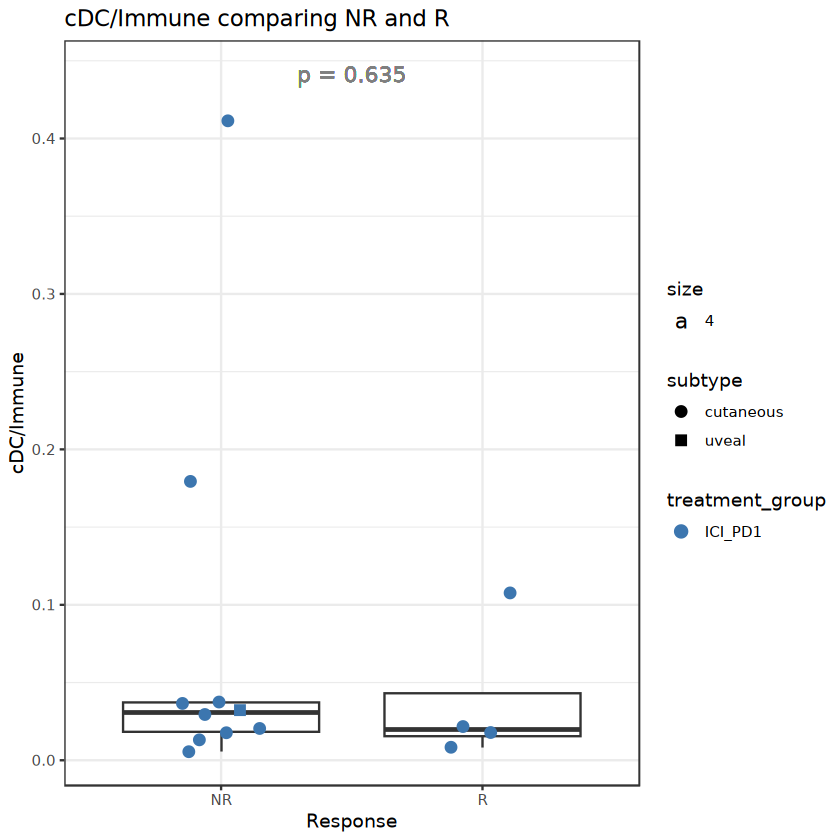

Warning message in geom_text(aes(x = 1.5, y = text_position_y, label = paste0("p = ", :
“All aesthetics have length 1, but the data has 14 rows.
ℹ Did you mean to use `annotate()`?”


$cDC_Immune

$Other_T_Immune

$pDC_Immune


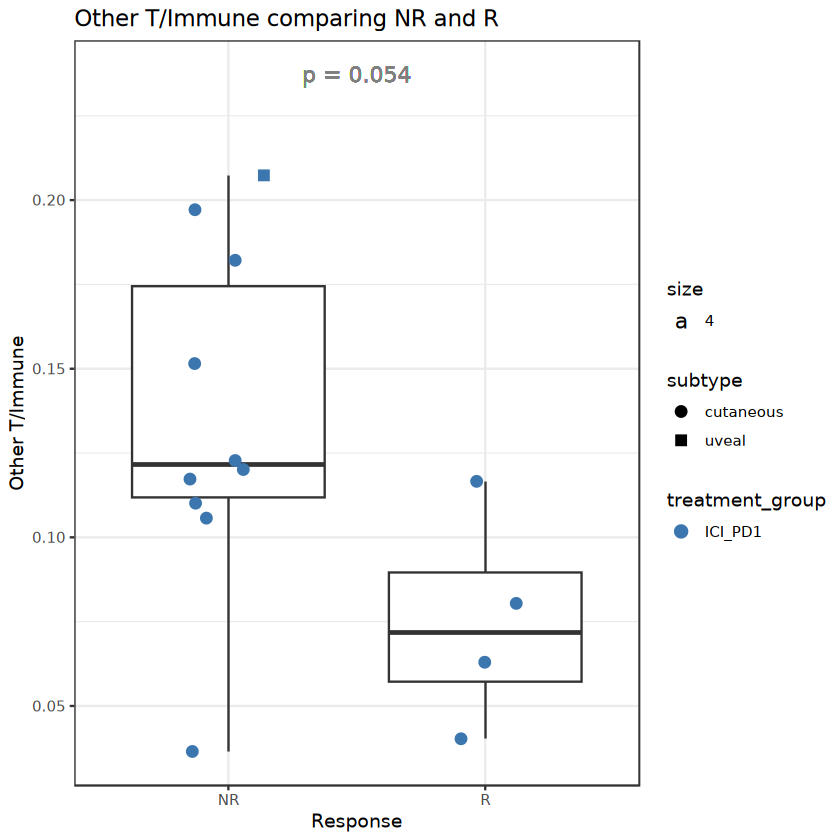

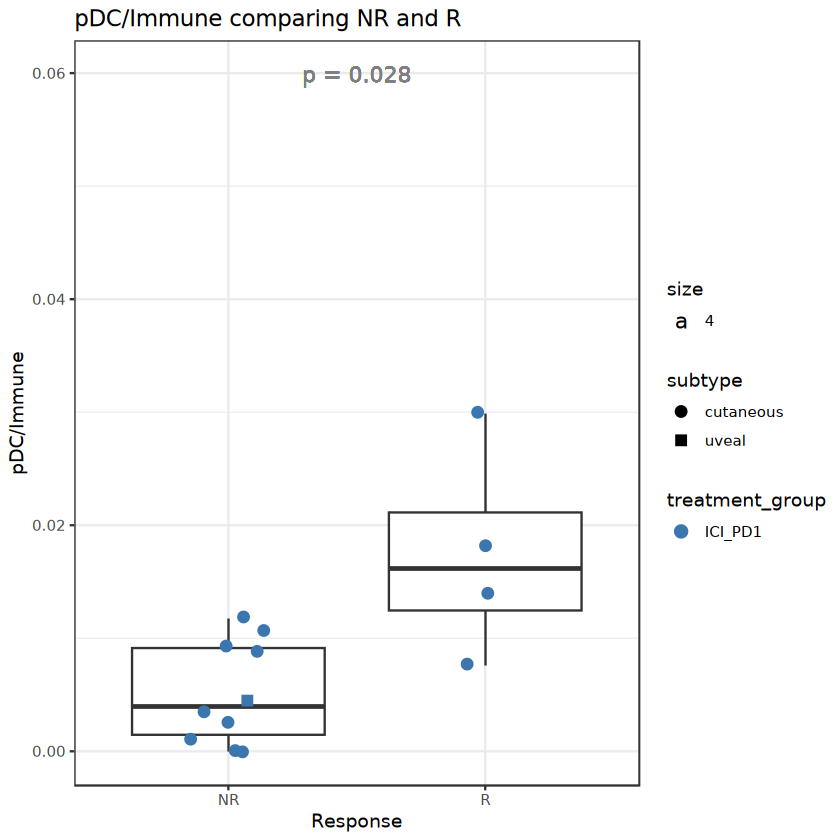

In [113]:
celltype_to_compartment_res_ICI_PD1 <- get_wilcoxon(merged_props_response_ICI_PD1, celltype_to_compartment_colnames, celltype_to_compartment_titles)

#generate boxplots for those with p-value < 0.1
celltype_to_compartment_res_ICI_PD1$index <- as.double(rownames(celltype_to_compartment_res_ICI_PD1))
sig_celltype_to_compartment_res_ICI_PD1 <- celltype_to_compartment_res_ICI_PD1 %>% filter(p_val < 0.1 |prop == 'cDC/Immune') #p_val < 0.1)


#generate boxplots for those with p-value < 0.1
all_plots <- list()
for (i in 1:length(sig_celltype_to_compartment_res_ICI_PD1$prop)) {

    plot <- generate_boxplot(merged_props_response_ICI_PD1, 
                             sig_celltype_to_compartment_res_ICI_PD1[i,], sig_celltype_to_compartment_res_ICI_PD1[i, 'abbr_prop'], 
                    celltype_to_compartment_titles)
    
    prop <- sig_celltype_to_compartment_res_ICI_PD1[i, 'abbr_prop']
    all_plots[[prop]] <-  plot
}

all_plots

Warning message in wilcox.test.default(nr_samples, r_samples, alternative = "two.sided"):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(nr_samples, r_samples, alternative = "two.sided"):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(nr_samples, r_samples, alternative = "two.sided"):
“cannot compute exact p-value with ties”
Warning message in geom_text(aes(x = 1.5, y = text_position_y, label = paste0("p = ", :
“All aesthetics have length 1, but the data has 14 rows.
ℹ Did you mean to use `annotate()`?”


$cDC_Total


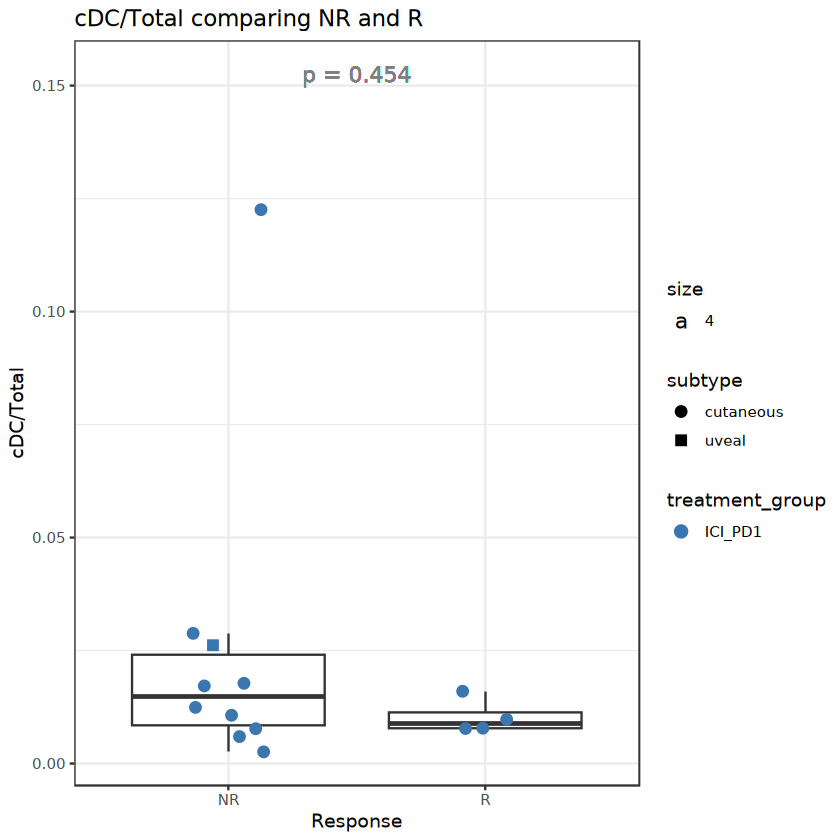

In [114]:
celltype_to_total_res_ICI_PD1 <- get_wilcoxon(merged_props_response_ICI_PD1, celltype_to_total_colnames, celltype_to_total_titles)

#generate boxplots for those with p-value < 0.1
celltype_to_total_res_ICI_PD1$index <- as.double(rownames(celltype_to_total_res_ICI_PD1))
sig_celltype_to_total_res_ICI_PD1 <- celltype_to_total_res_ICI_PD1 %>% filter(p_val < 0.1 |prop == 'cDC/Total') #p_val < 0.1)


#generate boxplots for those with p-value < 0.1
all_plots <- list()
for (i in 1:length(sig_celltype_to_total_res_ICI_PD1$prop)) {

    plot <- generate_boxplot(merged_props_response_ICI_PD1, 
                             sig_celltype_to_total_res_ICI_PD1[i,], sig_celltype_to_total_res_ICI_PD1[i, 'abbr_prop'], 
                    celltype_to_total_titles)
    
    prop <- sig_celltype_to_total_res_ICI_PD1[i, 'abbr_prop']
    all_plots[[prop]] <-  plot
}
all_plots

In [8]:
sessionInfo()

R version 4.2.3 (2023-03-15)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /net/bmc-lab5/data/kellis/users/cbw3/conda/envs/r-kernel/lib/libopenblasp-r0.3.21.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] gridExtra_2.3 ggplot2_3.5.0 dplyr_1.1.4  

loaded via a namespace (and not attached):
 [1] magrittr_2.0.3   munsell_0.5.1    tidyselect_1.2.1 uuid_1.2-0      
 [5] colorspace_2.1-0 R6_2.5.1         rlang_1.1.3      fastmap_1.1.1   
 [9] fansi_1.0.6      tools_4.2.3      grid_